<a href="https://colab.research.google.com/github/bhadmusm/MAI-Project/blob/main/MAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MAI PROJECT CODE IMPLEMENTATION**

**Maryam Bhadmus**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/MAI_project

Mounted at /content/gdrive
/content/gdrive/MyDrive/MAI_project


This is the code for the Feature selection. Edit the target from any of these to get the co-effients:

CPU power consumption - Percentage (%)

GPU consumption - Percentage (%)

IT Equipment Power (Watts)

RAM memory consumption - Percentage (%)






Top Features by Spearman and Pearson Correlation:
                                               Spearman   Pearson
RAM memory power consumption - Percentage (%)  0.954395  0.979355
CPU power consumption - Percentage (%)         0.944822  0.823637
GPU consumption - Percentage (%)               0.811636  0.821251
RAM temperature - Centigrade Degrees (Â°C)     0.806049  0.803276
GPU temperature - Centigrade Degrees (Â°C)     0.805519  0.819485
CPU temperature - Centigrade Degrees (Â°C)     0.804427  0.819613
RAM memory consumption - Percentage (%)        0.800325  0.804963
Power (PA) - Watts (W)                         0.696037  0.545796
Current (A)                                    0.681994  0.516095
Active Energy (KWh)                            0.535923  0.537696


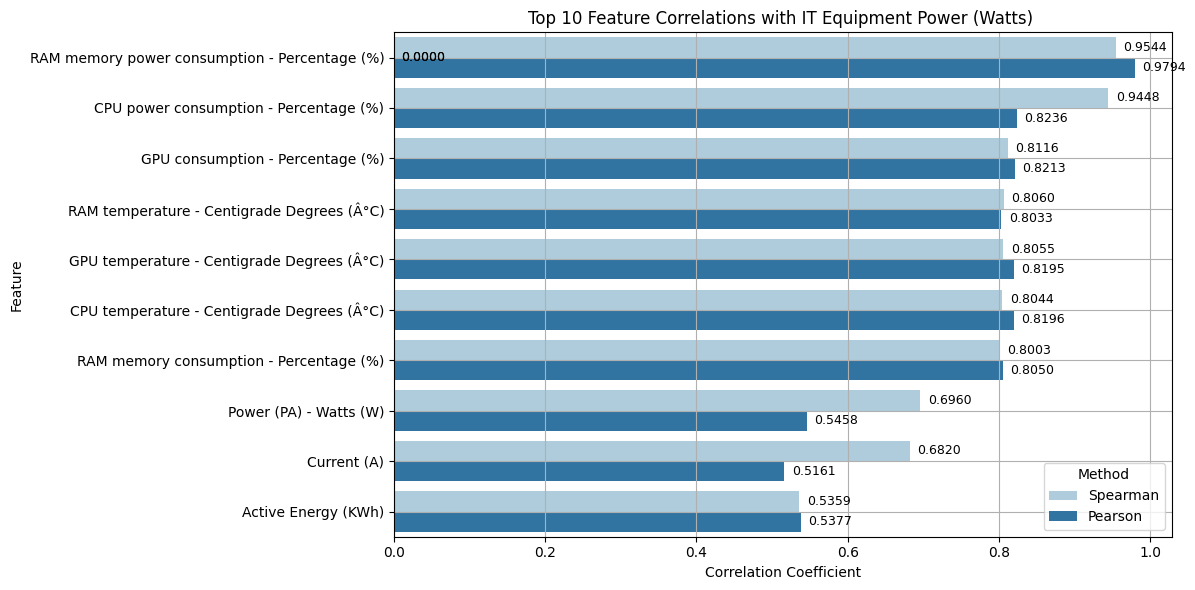


 Python list for your model:
features = ['RAM memory power consumption - Percentage (%)', 'CPU power consumption - Percentage (%)', 'GPU consumption - Percentage (%)', 'RAM temperature - Centigrade Degrees (Â°C)', 'GPU temperature - Centigrade Degrees (Â°C)', 'CPU temperature - Centigrade Degrees (Â°C)', 'RAM memory consumption - Percentage (%)', 'Power (PA) - Watts (W)', 'Current (A)', 'Active Energy (KWh)']


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# loading and processing data
file_path = 'normalized_allDataMeanFINAL_PUE.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df = df.dropna()
target = 'IT Equipment Power (Watts)'

# drop non-numeric or irrelevant features
drop_cols = ['DATETIME', target]
df_numeric = df.drop(columns=drop_cols)

# scale numeric features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_numeric)
df_scaled = pd.DataFrame(scaled_features, columns=df_numeric.columns)


df_scaled[target] = df[target].values

# compute Spearman and Pearson correlations
spearman_corr = df_scaled.corr(method='spearman')[target].drop(target)
pearson_corr = df_scaled.corr(method='pearson')[target].drop(target)

# adding to dataFrame
corr_df = pd.DataFrame({
    'Spearman': spearman_corr,
    'Pearson': pearson_corr
}).sort_values(by='Spearman', ascending=False)

print("\nTop Features by Spearman and Pearson Correlation:")
print(corr_df.head(10))

# plot barplots
top_n = 10
top_corr = corr_df.head(top_n).reset_index().melt(id_vars='index', value_vars=['Spearman', 'Pearson'])
top_corr.columns = ['Feature', 'Method', 'Correlation']

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_corr, x='Correlation', y='Feature', hue='Method', palette='Paired')

# add value annotations to bars
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.01 if width >= 0 else width - 0.05,
            p.get_y() + p.get_height() / 2,
            f'{width:.4f}',
            ha='left' if width >= 0 else 'right',
            va='center', fontsize=9)

plt.title("Top 10 Feature Correlations with IT Equipment Power (Watts) ")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.grid(True)
plt.legend(title="Method")
plt.tight_layout()
plt.show()

# extract top 10 shared features
top_10_spearman = spearman_corr.sort_values(ascending=False).head(10).index
top_10_pearson = pearson_corr.sort_values(ascending=False).head(10).index

shared_top_features = list(top_10_spearman.intersection(top_10_pearson))


# print python list
print("\n Python list for your model:")
print("features =", shared_top_features)


**MODEL 1: Linear Regression Model Implementation**

There is 4 code blocks to run, for each component

1.   CPU Power Consumption
2.   GPU Power Consumption
3.   RAM Power Consumption
4.   Combined IT Equipment Power Consumption


Linear Regression Architeture
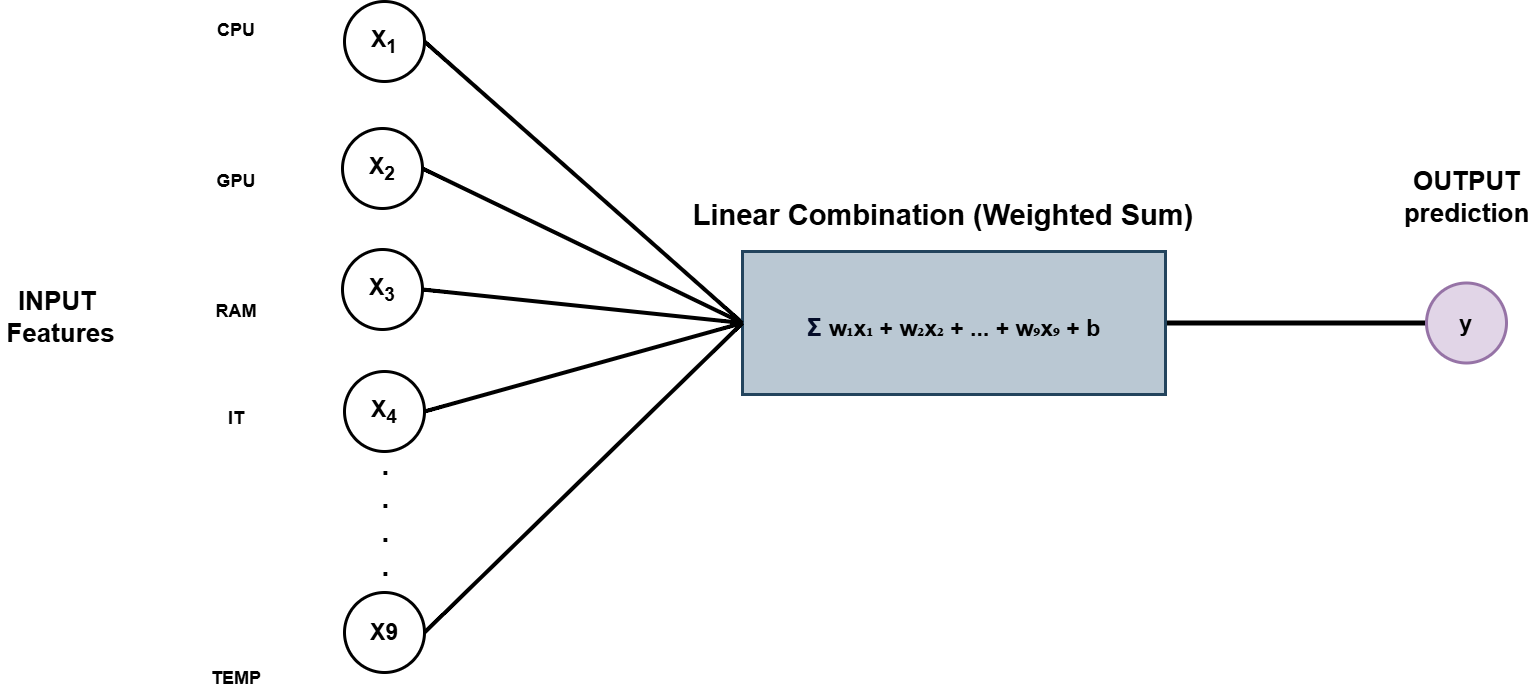









['DATETIME', 'weekday', 'Voltage (V)', 'Current (A)', 'Power (PA) - Watts (W)', 'Frecuency - Hertz (Hz)', 'Active Energy (KWh)', 'Power factor - Adimentional', 'CPU consumption (%)', 'CPU power consumption - Percentage (%)', 'CPU temperature - Centigrade Degrees (Â°C)', 'GPU consumption - Percentage (%)', 'GPU power consumption - Percentage (%)', 'GPU temperature - Centigrade Degrees (Â°C)', 'RAM memory consumption - Percentage (%)', 'RAM memory power consumption - Percentage (%)', 'RAM temperature - Centigrade Degrees (Â°C)', 'IT Equipment Power (Watts)']

Multivariate linear regression cpu power consumption
Test rmse     : 0.1207
Test mae      : 0.1015
Test r²       : -6.8401
Total execution time: 0.47 seconds


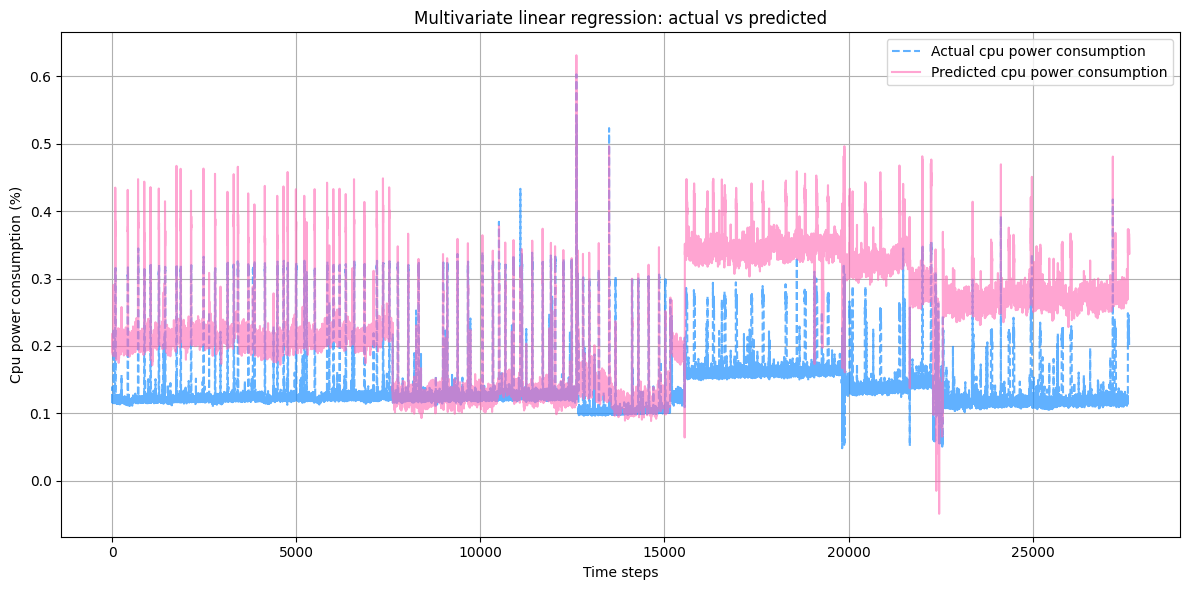

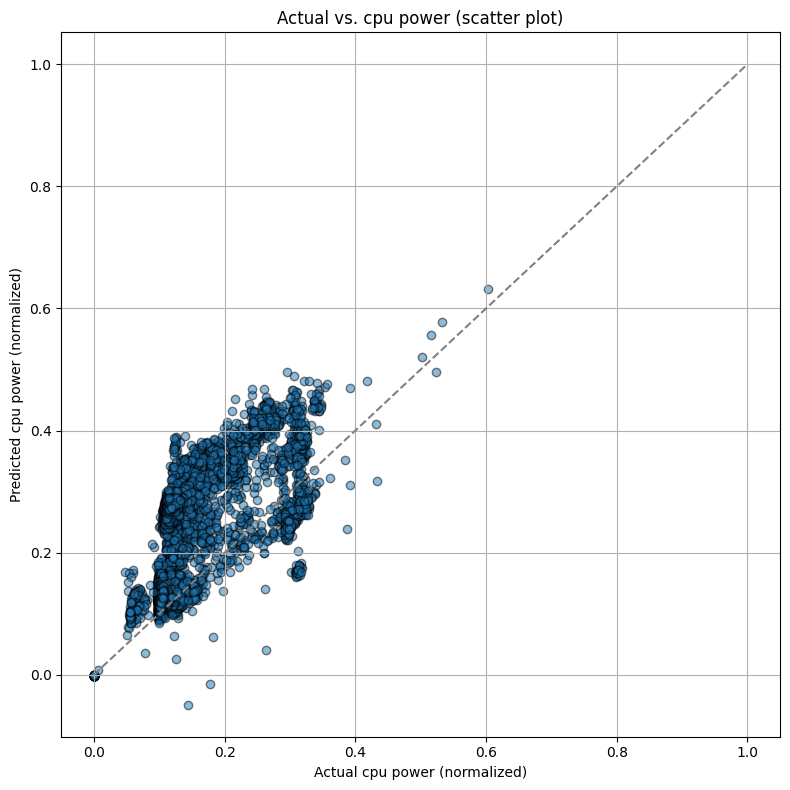

In [ ]:
#===================================LINEAR REGRESSION CPU===============#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# start timing
start_time = time.time()

# load dataset and process
file_path = 'normalized_allDataMeanFINAL_PUE.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# define features and target
features = ['IT Equipment Power (Watts)',
            'RAM memory power consumption - Percentage (%)',
            'GPU consumption - Percentage (%)',
            'CPU temperature - Centigrade Degrees (Â°C)',
            'RAM temperature - Centigrade Degrees (Â°C)',
            'GPU temperature - Centigrade Degrees (Â°C)',
            'RAM memory consumption - Percentage (%)',
            'Power (PA) - Watts (W)',
            'Current (A)']
target_column = 'CPU power consumption - Percentage (%)'

# clean column names and check
df.columns = df.columns.str.strip()
print(df.columns.tolist())

# drop rows with missing values
col_req = features + [target_column]
df = df.dropna(subset=col_req)

# scale features and target
x_scaler = MinMaxScaler()
X_all = x_scaler.fit_transform(df[features])

y_scaler = MinMaxScaler()
y_all = y_scaler.fit_transform(df[[target_column]])

# train-test split (no filtering yet)
train_len = int(len(X_all) * 0.7)
val_len = int(len(X_all) * 0.15)

X_train = X_all[:train_len]
y_train = y_all[:train_len]

X_val = X_all[train_len:train_len + val_len]
y_val = y_all[train_len:train_len + val_len]

X_test = X_all[train_len + val_len:]
y_test = y_all[train_len + val_len:]

# fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# inverse transform predictions and targets
y_test_orig = y_scaler.inverse_transform(y_test)
y_pred_orig = y_scaler.inverse_transform(y_pred)

# === filter for active data (after prediction) ===
active_mask = y_test_orig.flatten() > 0.01
y_test_active = y_test_orig[active_mask]
y_pred_active = y_pred_orig[active_mask]

# === evaluation metrics ===
rmse = np.sqrt(mean_squared_error(y_test_active, y_pred_active))
mae = mean_absolute_error(y_test_active, y_pred_active)
r2 = r2_score(y_test_active, y_pred_active)

print(f"\nMultivariate linear regression cpu power consumption")
print(f"Test rmse     : {rmse:.4f}")
print(f"Test mae      : {mae:.4f}")
print(f"Test r²       : {r2:.4f}")

# time taken
elapsed = time.time() - start_time
print(f"Total execution time: {elapsed:.2f} seconds")

# === plotting ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_active, label='Actual cpu power consumption', linestyle='--', alpha=0.7, color='dodgerblue')
plt.plot(y_pred_active, label='Predicted cpu power consumption', alpha=0.6, color='hotpink')
plt.title("Multivariate linear regression: actual vs predicted")
plt.xlabel("Time steps")
plt.ylabel("Cpu power consumption (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Actual cpu power (normalized)")
plt.ylabel("Predicted cpu power (normalized)")
plt.title("Actual vs. cpu power (scatter plot)")
plt.grid(True)
plt.tight_layout()
plt.show()






['DATETIME', 'weekday', 'Voltage (V)', 'Current (A)', 'Power (PA) - Watts (W)', 'Frecuency - Hertz (Hz)', 'Active Energy (KWh)', 'Power factor - Adimentional', 'CPU consumption (%)', 'CPU power consumption - Percentage (%)', 'CPU temperature - Centigrade Degrees (Â°C)', 'GPU consumption - Percentage (%)', 'GPU power consumption - Percentage (%)', 'GPU temperature - Centigrade Degrees (Â°C)', 'RAM memory consumption - Percentage (%)', 'RAM memory power consumption - Percentage (%)', 'RAM temperature - Centigrade Degrees (Â°C)', 'IT Equipment Power (Watts)']

Multivariate Linear Regression CPU Power Consumption
Test RMSE     : 0.1191
Test MAE      : 0.1002
Test R²       : -1.8432
Total Execution Time: 0.51 seconds


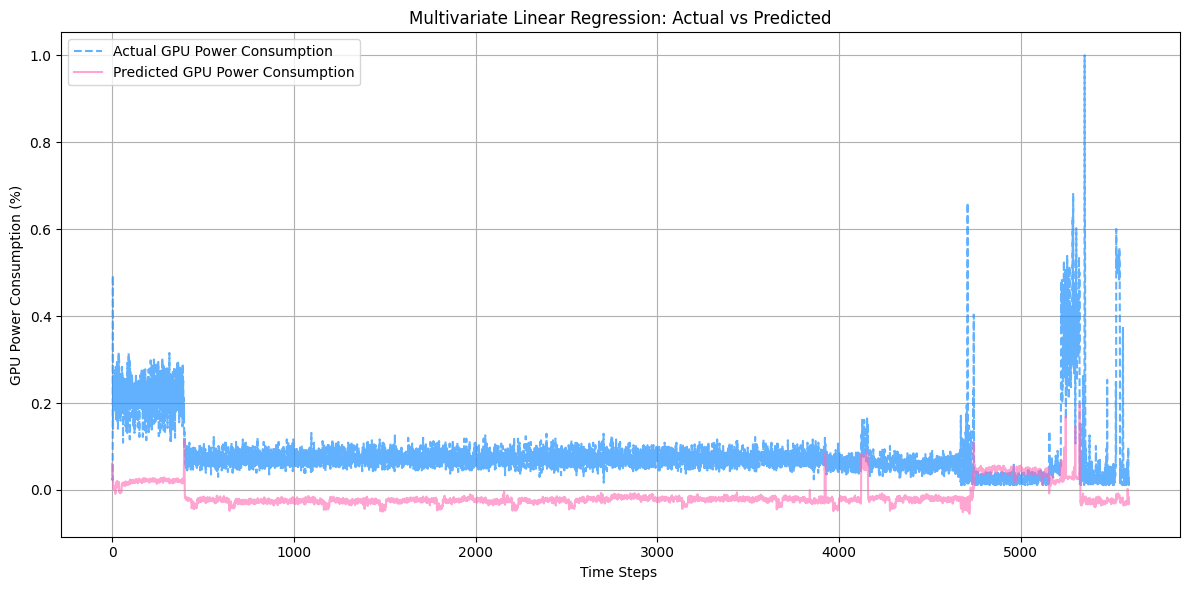

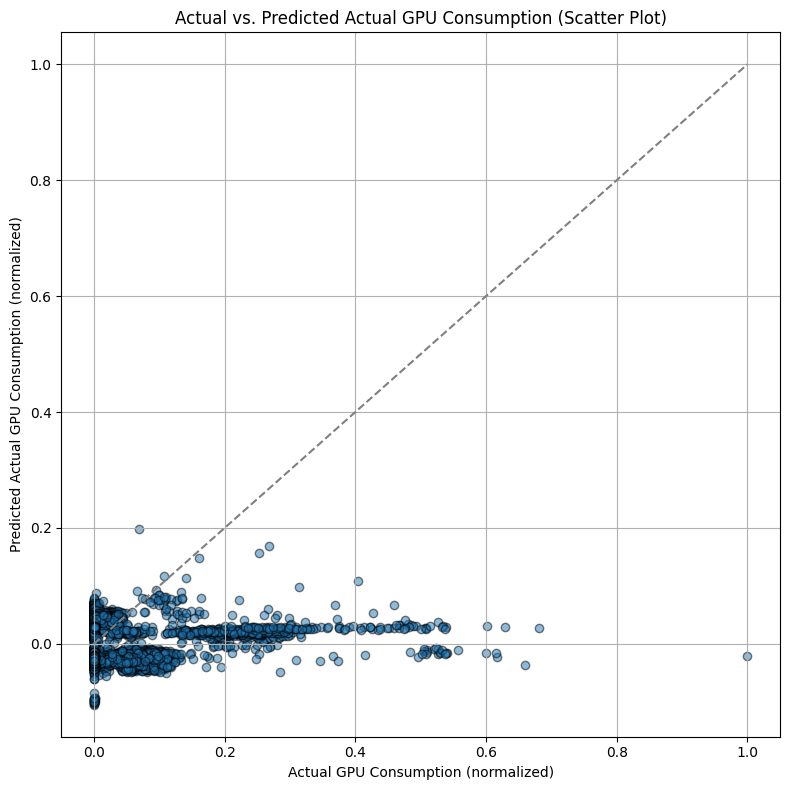

In [ ]:
#===================================LINEAR REGRESSION GPU===============#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
import time

# start timing
start_time = time.time()

# load and processing dataset
file_path = 'normalized_allDataMeanFINAL_PUE.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

features = ['RAM memory power consumption - Percentage (%)',
            'GPU consumption - Percentage (%)',
            'CPU temperature - Centigrade Degrees (Â°C)',
            'RAM temperature - Centigrade Degrees (Â°C)',
            'GPU temperature - Centigrade Degrees (Â°C)',
            'RAM memory consumption - Percentage (%)',
            'Power (PA) - Watts (W)',
            'Current (A)',
            'Active Energy (KWh)'
            ]
target_column = 'GPU power consumption - Percentage (%)'
print(df.columns.tolist())

# rop rows with missing values
columns_needed = features + [target_column]
df = df.dropna(subset=columns_needed)

# scaling features and the targets
x_scaler = MinMaxScaler()
X_all = x_scaler.fit_transform(df[features])

y_scaler = MinMaxScaler()
y_all = y_scaler.fit_transform(df[[target_column]])

# train test split
train_size = int(len(X_all) * 0.7)
val_size = int(len(X_all) * 0.15)

X_train = X_all[:train_size]
y_train = y_all[:train_size]

X_val = X_all[train_size:train_size + val_size]
y_val = y_all[train_size:train_size + val_size]

X_test = X_all[train_size + val_size:]
y_test = y_all[train_size + val_size:]

# Ffitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# prediction
y_pred = model.predict(X_test)

# inverse transform the predictions and targets
y_test_orig = y_scaler.inverse_transform(y_test)
y_pred_orig = y_scaler.inverse_transform(y_pred)

# filtering for active data after prediction
active_mask = y_test_orig.flatten() > 0.01
y_test_active = y_test_orig[active_mask]
y_pred_active = y_pred_orig[active_mask]

# calulating and sidplay output metrics
rmse = np.sqrt(mean_squared_error(y_test_active, y_pred_active))
mae = mean_absolute_error(y_test_active, y_pred_active)
r2 = r2_score(y_test_active, y_pred_active)

print(f"\nMultivariate Linear Regression GPU Power Consumption")
print(f"Test RMSE     : {rmse:.4f}")
print(f"Test MAE      : {mae:.4f}")
print(f"Test R²       : {r2:.4f}")

# runtime measure
elapsed = time.time() - start_time
print(f"Total Execution Time: {elapsed:.2f} seconds")


# plotting line and scatter plot
plt.figure(figsize=(12, 6))
plt.plot(y_test_active, label='Actual GPU Power Consumption', linestyle='--', alpha=0.7, color='dodgerblue')
plt.plot(y_pred_active, label='Predicted GPU Power Consumption', alpha=0.6, color='hotpink')
plt.title("Multivariate Linear Regression: Actual vs Predicted")
plt.xlabel("Time Steps ")
plt.ylabel("GPU Power Consumption (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Actual GPU Consumption (normalized)")
plt.ylabel("Predicted Actual GPU Consumption (normalized)")
plt.title("Actual vs. Predicted Actual GPU Consumption (Scatter Plot)")
plt.grid(True)
plt.tight_layout()
plt.show()


['DATETIME', 'weekday', 'Voltage (V)', 'Current (A)', 'Power (PA) - Watts (W)', 'Frecuency - Hertz (Hz)', 'Active Energy (KWh)', 'Power factor - Adimentional', 'CPU consumption (%)', 'CPU power consumption - Percentage (%)', 'CPU temperature - Centigrade Degrees (Â°C)', 'GPU consumption - Percentage (%)', 'GPU power consumption - Percentage (%)', 'GPU temperature - Centigrade Degrees (Â°C)', 'RAM memory consumption - Percentage (%)', 'RAM memory power consumption - Percentage (%)', 'RAM temperature - Centigrade Degrees (Â°C)', 'IT Equipment Power (Watts)']

Multivariate Linear Regression RAM Power Consumption
Test RMSE     : 0.1420
Test MAE      : 0.1207
Test R²       : -2.0913
Total Execution Time: 0.49 seconds


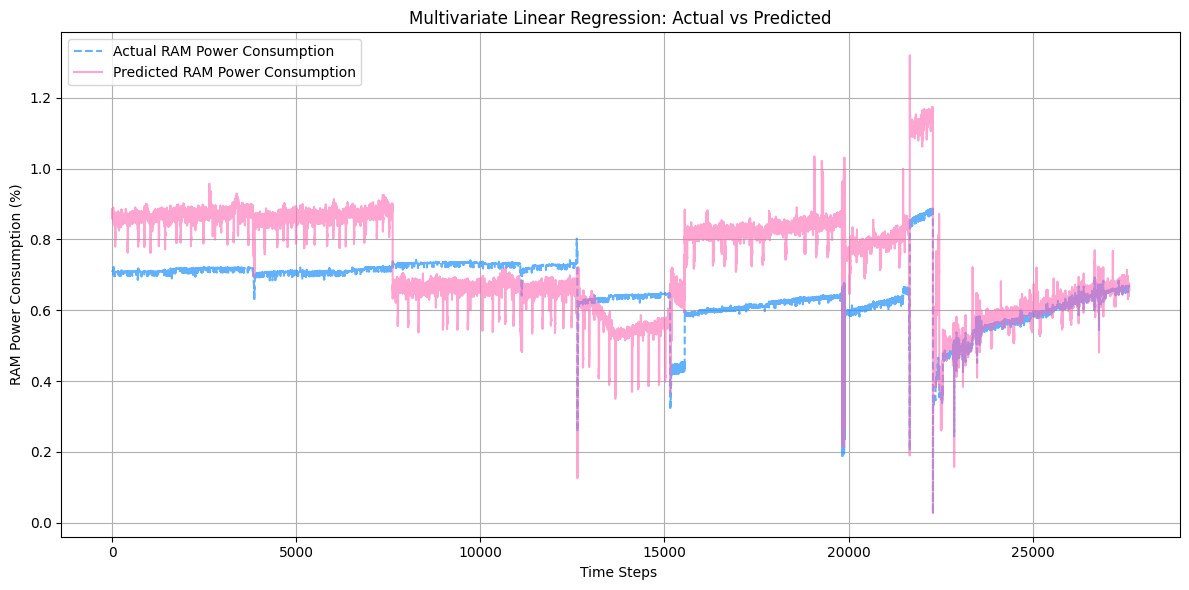

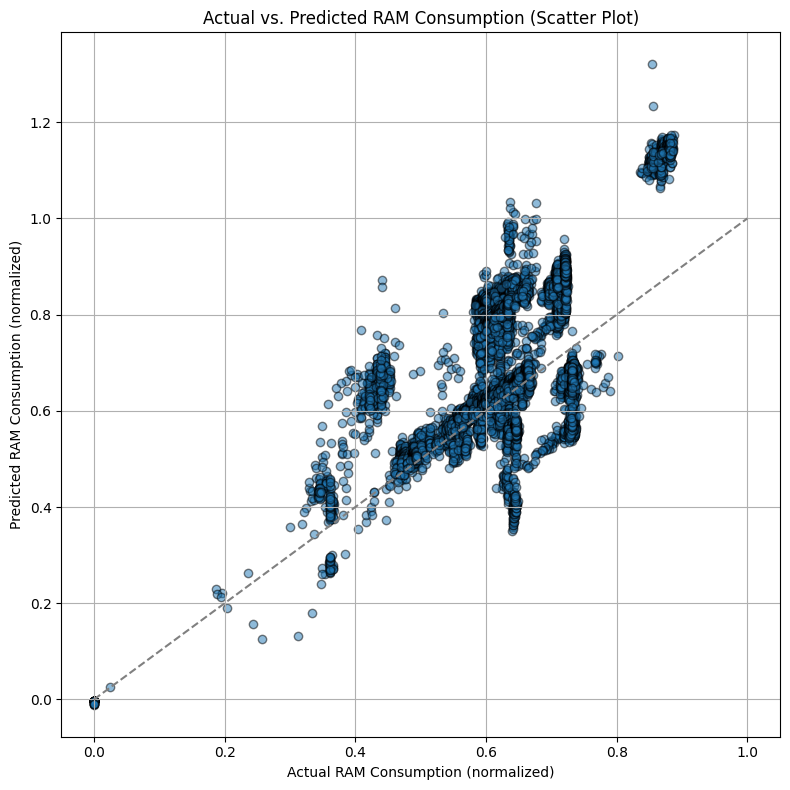

In [ ]:
#===================================LINEAR REGRESSION RAM===============#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
import time

# Start timing
start_time = time.time()

# Load dataset
file_path = 'normalized_allDataMeanFINAL_PUE.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Define features and target
features = ['IT Equipment Power (Watts)',
            'RAM memory consumption - Percentage (%)',
            'GPU consumption - Percentage (%)',
            'GPU temperature - Centigrade Degrees (Â°C)',
            'RAM temperature - Centigrade Degrees (Â°C)',
            'CPU temperature - Centigrade Degrees (Â°C)',
            'Power (PA) - Watts (W)',
            'Current (A)',
            'Active Energy (KWh)']
target_column = 'RAM memory power consumption - Percentage (%)'
print(df.columns.tolist())

# Drop rows with missing values
columns_needed = features + [target_column]
df = df.dropna(subset=columns_needed)

# Scale features and target
x_scaler = MinMaxScaler()
X_all = x_scaler.fit_transform(df[features])

y_scaler = MinMaxScaler()
y_all = y_scaler.fit_transform(df[[target_column]])

# Train-test split (no filtering yet)
train_size = int(len(X_all) * 0.7)
val_size = int(len(X_all) * 0.15)

X_train = X_all[:train_size]
y_train = y_all[:train_size]

X_val = X_all[train_size:train_size + val_size]
y_val = y_all[train_size:train_size + val_size]

X_test = X_all[train_size + val_size:]
y_test = y_all[train_size + val_size:]

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Inverse transform predictions and targets
y_test_orig = y_scaler.inverse_transform(y_test)
y_pred_orig = y_scaler.inverse_transform(y_pred)

# === Filter for active data (AFTER prediction) ===
active_mask = y_test_orig.flatten() > 0.01
y_test_active = y_test_orig[active_mask]
y_pred_active = y_pred_orig[active_mask]

# === Evaluation Metrics ===
rmse = np.sqrt(mean_squared_error(y_test_active, y_pred_active))
mae = mean_absolute_error(y_test_active, y_pred_active)
r2 = r2_score(y_test_active, y_pred_active)

print(f"\nMultivariate Linear Regression RAM Power Consumption")
print(f"Test RMSE     : {rmse:.4f}")
print(f"Test MAE      : {mae:.4f}")
print(f"Test R²       : {r2:.4f}")

# Time taken
elapsed = time.time() - start_time
print(f"Total Execution Time: {elapsed:.2f} seconds")


# Plot active region only
plt.figure(figsize=(12, 6))
plt.plot(y_test_active, label='Actual RAM Power Consumption', linestyle='--', alpha=0.7, color='dodgerblue')
plt.plot(y_pred_active, label='Predicted RAM Power Consumption', alpha=0.6, color='hotpink')
plt.title("Multivariate Linear Regression: Actual vs Predicted")
plt.xlabel("Time Steps ")
plt.ylabel("RAM Power Consumption (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # ideal line
plt.xlabel("Actual RAM Consumption (normalized)")
plt.ylabel("Predicted RAM Consumption (normalized)")
plt.title("Actual vs. Predicted RAM Consumption (Scatter Plot)")
plt.grid(True)
plt.tight_layout()
plt.show()



Multivariate Linear Regression – IT Equipment Power Consumption
Test RMSE     : 0.2400
Test MAE      : 0.2167
Test R²       : -11.5155
Actual PUE (average): 1.85
Predicted PUE (average): 1.74
Total Execution Time: 0.47 seconds


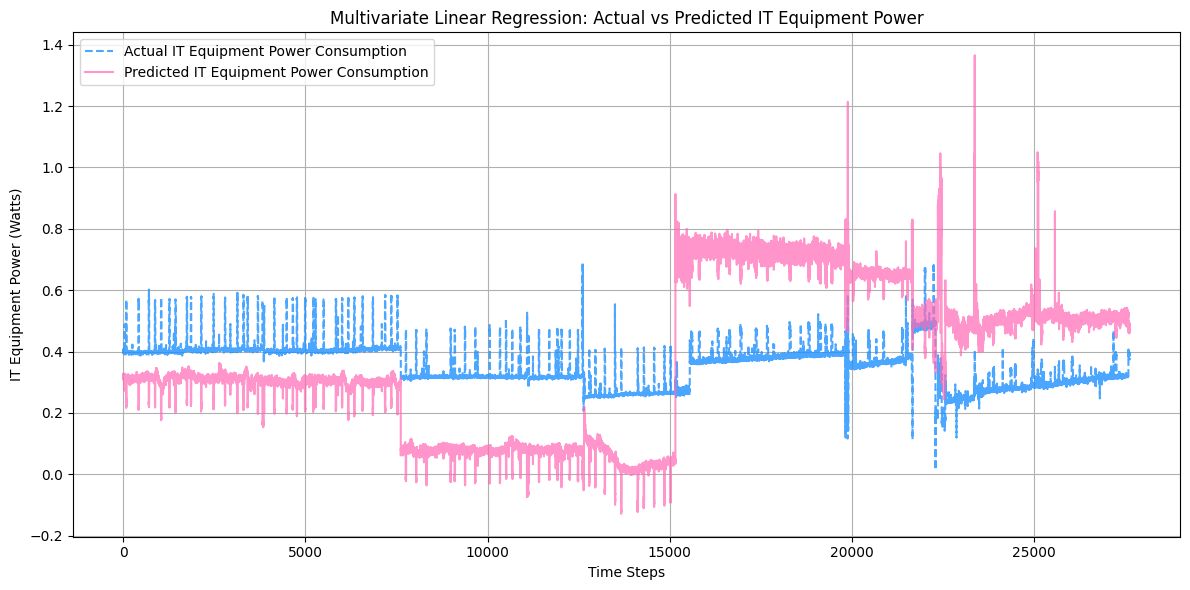

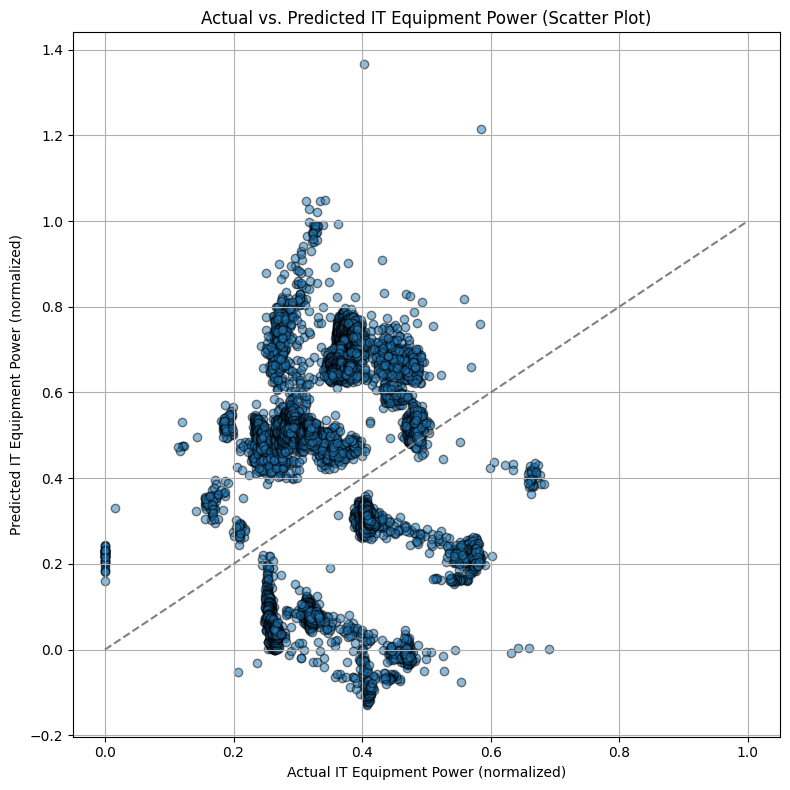

In [ ]:
#===================================LINEAR REGRESSION: IT EQUIPMENT POWER===============#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import time

# Start timing
start_time = time.time()

# Load dataset
file_path = 'normalized_allDataMeanFINAL_PUE.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Define features and target
features = [
    'RAM memory consumption - Percentage (%)',
    'CPU consumption (%)',
    'GPU power consumption - Percentage (%)',
    'RAM temperature - Centigrade Degrees (Â°C)',
    'GPU temperature - Centigrade Degrees (Â°C)',
    'CPU temperature - Centigrade Degrees (Â°C)',
    'Power (PA) - Watts (W)',
    'Current (A)',
    'Active Energy (KWh)'
]
target_column = 'IT Equipment Power (Watts)'

# Drop rows with missing values
columns_needed = features + [target_column]
df = df.dropna(subset=columns_needed)

# Scale features and target
x_scaler = MinMaxScaler()
X_all = x_scaler.fit_transform(df[features])

y_scaler = MinMaxScaler()
y_all = y_scaler.fit_transform(df[[target_column]])

# Train-test split
train_size = int(len(X_all) * 0.7)
val_size = int(len(X_all) * 0.15)

X_train = X_all[:train_size]
y_train = y_all[:train_size]

X_val = X_all[train_size:train_size + val_size]
y_val = y_all[train_size:train_size + val_size]

X_test = X_all[train_size + val_size:]
y_test = y_all[train_size + val_size:]

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Inverse transform predictions and targets
y_test_orig = y_scaler.inverse_transform(y_test)
y_pred_orig = y_scaler.inverse_transform(y_pred)

# === Filter for active data (AFTER prediction) ===
active_mask_it = y_test_orig.flatten() > 0.01
y_test_active_it = y_test_orig[active_mask_it]
y_pred_active_it = y_pred_orig[active_mask_it]

# === Evaluation Metrics ===
rmse = np.sqrt(mean_squared_error(y_test_active_it, y_pred_active_it))
mae = mean_absolute_error(y_test_active_it, y_pred_active_it)
r2 = r2_score(y_test_active_it, y_pred_active_it)

# Additional PUE Calculation
actual_it_power_full = df['IT Equipment Power (Watts)'].values
facility_power_full = df['Power (PA) - Watts (W)'].values

actual_it_power_test = actual_it_power_full[train_size + val_size:]
facility_power_test = facility_power_full[train_size + val_size:]

actual_it_power_test_active = actual_it_power_test[active_mask_it]
facility_power_test_active = facility_power_test[active_mask_it]
predicted_it_power_active = y_pred_orig[active_mask_it].flatten()

avg_actual_it_power = np.mean(actual_it_power_test_active)
avg_predicted_it_power = np.mean(predicted_it_power_active)
avg_facility_power = np.mean(facility_power_test_active)

actual_pue = avg_facility_power / avg_actual_it_power
predicted_pue = avg_facility_power / avg_predicted_it_power

# === Output Results ===
print(f"\nMultivariate Linear Regression – IT Equipment Power Consumption")
print(f"Test RMSE     : {rmse:.4f}")
print(f"Test MAE      : {mae:.4f}")
print(f"Test R²       : {r2:.4f}")
print(f"Actual PUE (average): {actual_pue:.2f}")
print(f"Predicted PUE (average): {predicted_pue:.2f}")
print(f"Total Execution Time: {time.time() - start_time:.2f} seconds")

# === Plotting ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_active_it, label='Actual IT Equipment Power Consumption', linestyle='--', alpha=0.8, color='dodgerblue')
plt.plot(y_pred_active_it, label='Predicted IT Equipment Power Consumption', alpha=0.7, color='hotpink')
plt.title("Multivariate Linear Regression: Actual vs Predicted IT Equipment Power")
plt.xlabel("Time Steps")
plt.ylabel("IT Equipment Power (Watts)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter Plot
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # ideal line
plt.xlabel("Actual IT Equipment Power (normalized)")
plt.ylabel("Predicted IT Equipment Power (normalized)")
plt.title("Actual vs. Predicted IT Equipment Power (Scatter Plot)")
plt.grid(True)
plt.tight_layout()
plt.show()


**MODEL 2: CNN-LSTM Model Implementation**

There is 4 code blocks to run, for each component

1.   CPU Power Consumption
2.   GPU Power Consumption
3.   RAM Power Consumption
4.   Combined IT Equipment Power Consumption



CNN-LSTM Model Architecture

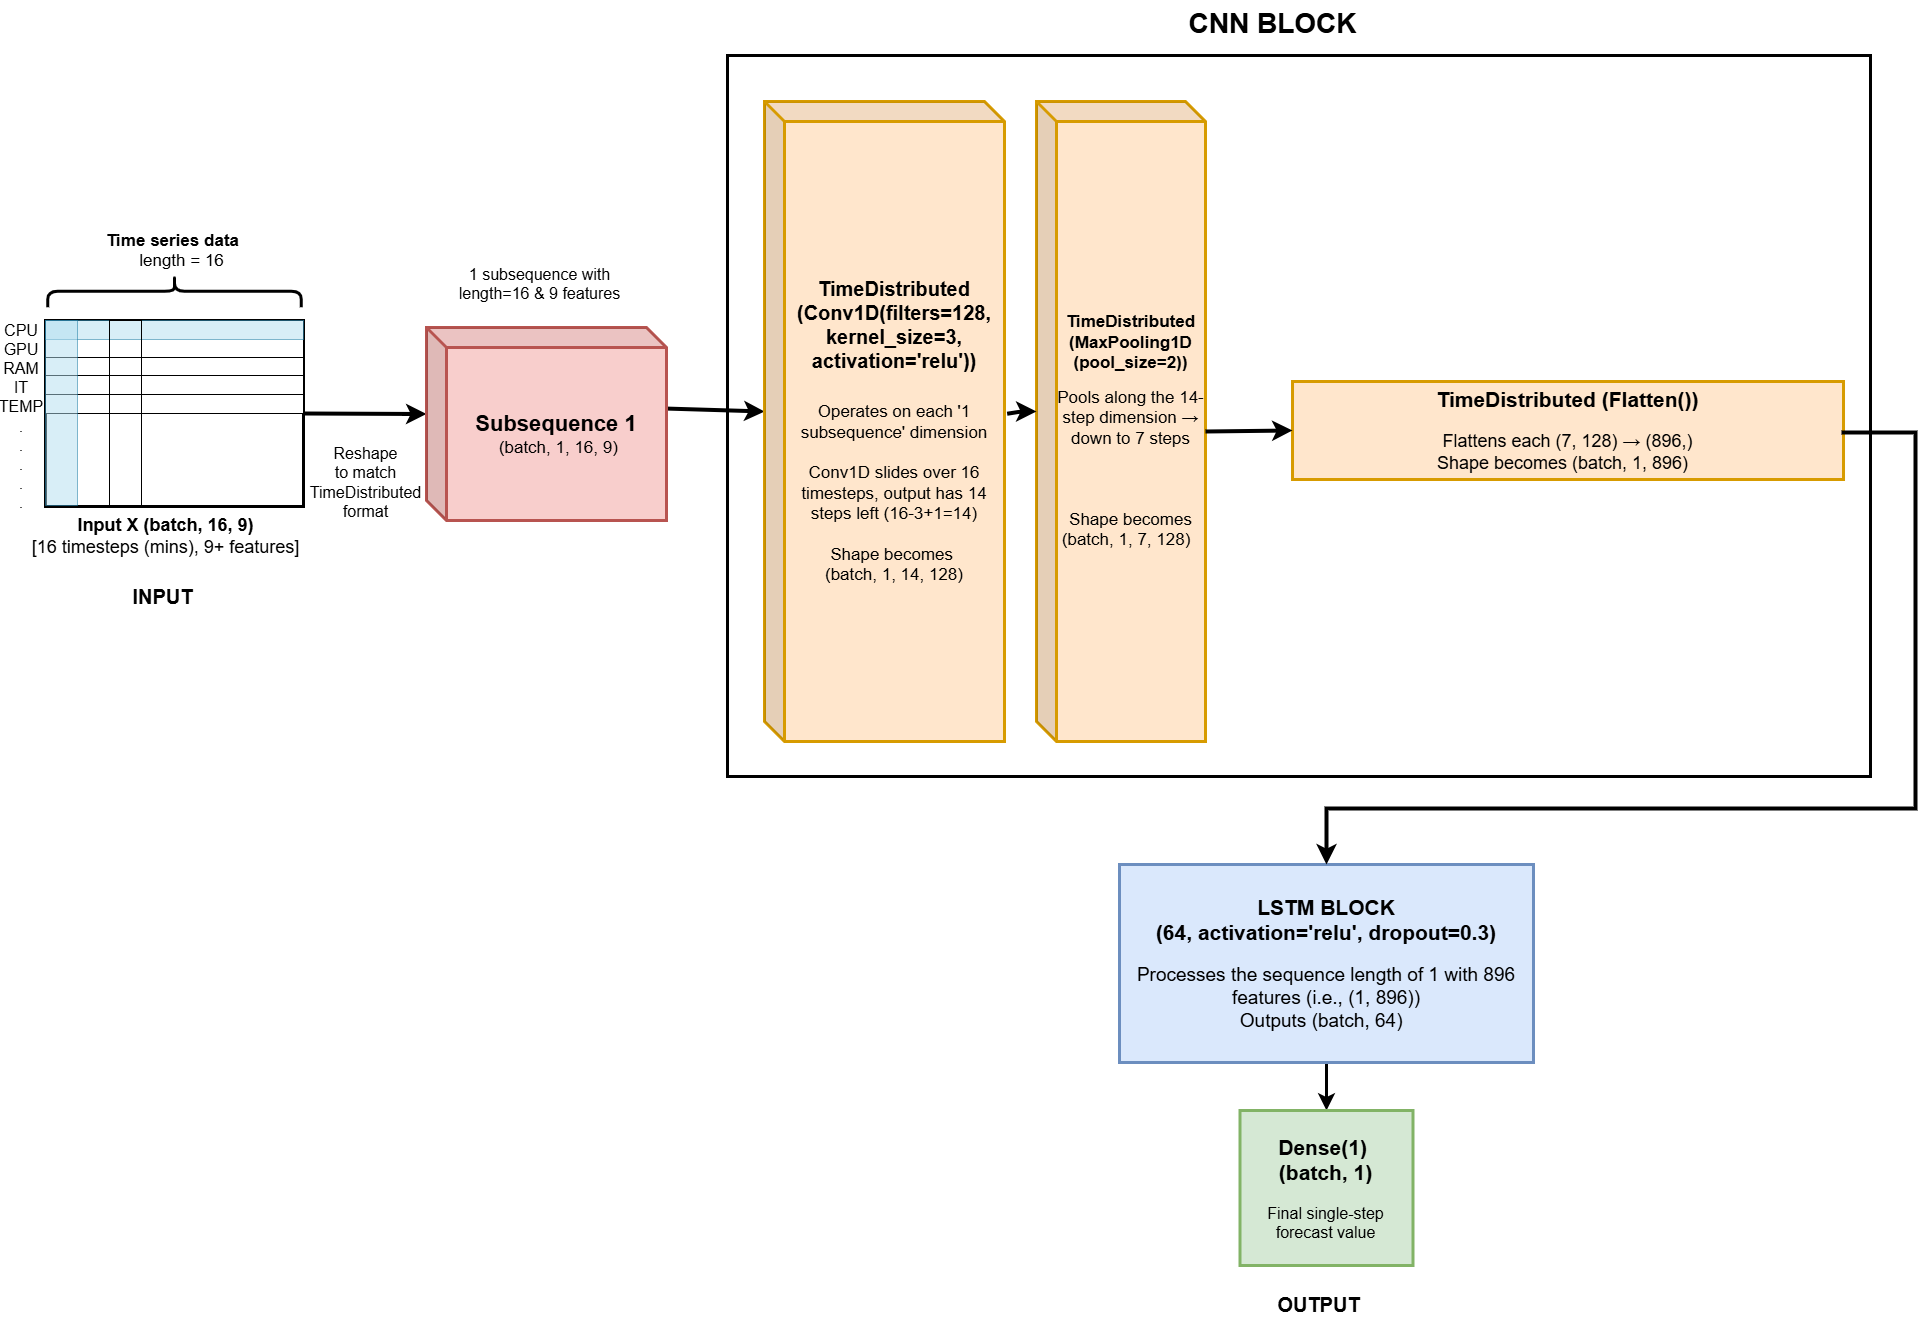

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_51             │ (None, None, 14, 128)  │         3,584 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_52             │ (None, None, 7, 128)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_53             │ (None, None, 896)      │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 64)             │       246,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,665 (975.25 KB)

 Trainable params: 249,665 (975.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
9797/9797 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 6.5161e-04 - val_loss: 2.0901e-04 - learning_rate: 1.0000e-04
Epoch 2/50
9797/9797 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 2.3856e-04 - val_loss: 2.1728e-04 - learning_rate: 1.0000e-04
Epoch 3/50
9797/9797 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 2.1770e-04 - val_loss: 1.8421e-04 - learning_rate: 1.0000e-04
Epoch 4/50
9776/9797 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8974e-04
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
9797/9797 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 1.8973e-04 - val_loss: 1.7749e-04 - learning_rate: 1.0000e-04
Epoch 5/50
9797/9797 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 1.6662e-04 - val_loss: 1.7067e-04 - learning_rate: 5.0000e-05
Epoch 6/50
9797/9797 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 1.6240e-04 - val_loss: 1.7106e-04 - learning_rate: 5.0000e-05
Epoch 7/50
9779/9797 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4931e-04
Epoch 7: ReduceLROnPlateau reducing lea

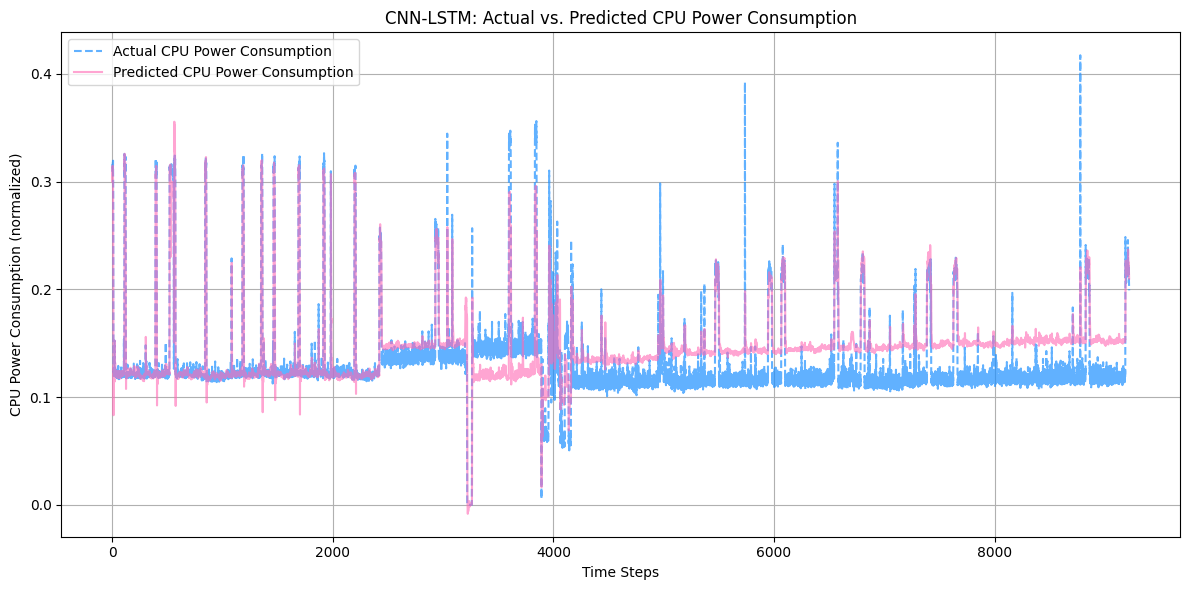

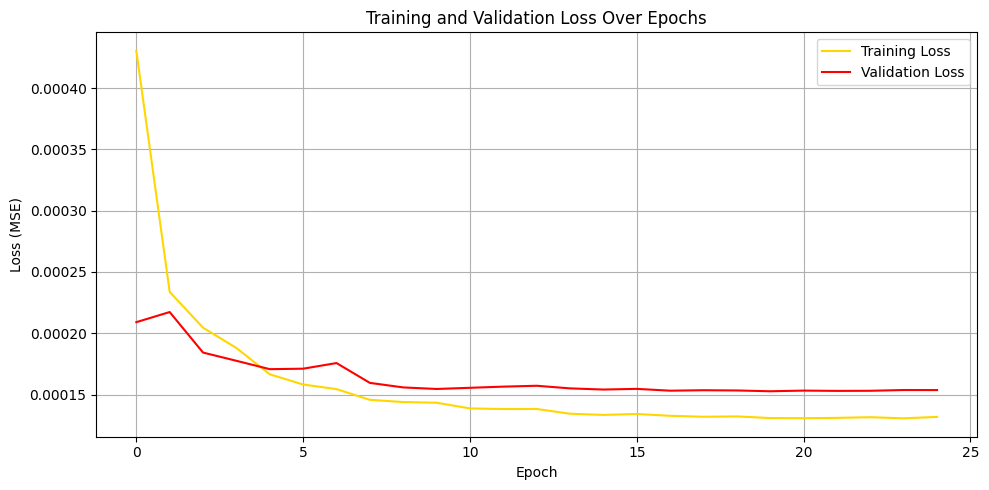

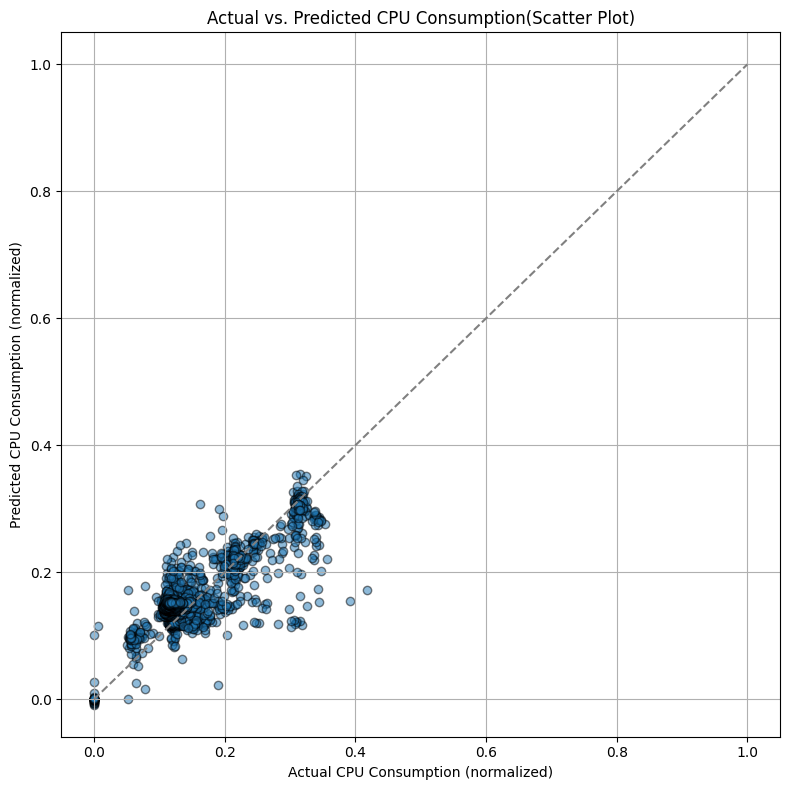

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, TimeDistributed, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from sklearn.preprocessing import MinMaxScaler  # May not be necessary if your data is already in [0,1].
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.optimizers import Adam


# Start timing
start_time = time.time()

# ---------------------------------------------------
# 1. Load and prepare data
# ---------------------------------------------------
data = pd.read_csv('normalized_allDataMeanFINAL_PUE.csv', encoding='ISO-8859-1')

# Convert DATETIME to datetime format and sort
data['DATETIME'] = pd.to_datetime(data['DATETIME'], errors='coerce')
data = data.sort_values(by='DATETIME')

# Define Features and Target
features = ['IT Equipment Power (Watts)',
            'RAM memory power consumption - Percentage (%)',
            'GPU consumption - Percentage (%)',
            'CPU temperature - Centigrade Degrees (Â°C)',
            'RAM temperature - Centigrade Degrees (Â°C)',
            'GPU temperature - Centigrade Degrees (Â°C)',
            'RAM memory consumption - Percentage (%)',
            'Power (PA) - Watts (W)',
            'Current (A)'
            ]
target = ['CPU power consumption - Percentage (%)']

# Ensure columns exist
available_features = [col for col in features if col in data.columns]
if target[0] not in data.columns:
    raise ValueError(f"Target column '{target[0]}' not found in dataset!")

# Drop rows with missing values
data = data.dropna(subset=available_features + target)

# (Optional) Scaling -- only if your data is not already in [0,1]
# scaler_features = MinMaxScaler()
# scaler_target = MinMaxScaler()
# feature_data = scaler_features.fit_transform(data[available_features])
# target_data = scaler_target.fit_transform(data[target])
# If data is already in [0,1], then just do:
feature_data = data[available_features].values
target_data = data[target].values.ravel()

# ---------------------------------------------------
# 2. Create sequences
# ---------------------------------------------------
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 16
X, y = create_sequences(feature_data, target_data, SEQ_LENGTH)

# ---------------------------------------------------
# 3. Train / validation / test split (70 / 15 / 15)
# ---------------------------------------------------
train_end = int(len(X) * 0.85)
val_end = int(len(X) * 0.95)
 # additional 15% for validation
X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val = X[train_end:val_end], y[train_end:val_end]
X_test, y_test = X[val_end:], y[val_end:]

#X_train, y_train = X[0:50000], y[0:50000]
#X_val, y_val = X[50001:60000], y[50001:60000]
#X_test, y_test = X[60001:75500], y[60001:75500]

'''
print("Training target mean:", y_train.mean(), "std:", y_train.std())
print("Validation target mean:", y_val.mean(), "std:", y_val.std())
print("Test target mean:", y_test.mean(), "std:", y_test.std())

import matplotlib.pyplot as plt
plt.plot(target_data)  # or data[target[0]]
plt.title("Target Over Time")
plt.xlabel("Time index")
plt.ylabel("CPU Power Consumption")
plt.show()
'''
# ---------------------------------------------------
# 4. Reshape for CNN-LSTM sub-sequence approach
# ---------------------------------------------------
sub_seq = 1
time_steps = SEQ_LENGTH // sub_seq
n_features = X.shape[2]

X_train = X_train.reshape((X_train.shape[0], sub_seq, time_steps, n_features))
X_val = X_val.reshape((X_val.shape[0], sub_seq, time_steps, n_features))
X_test = X_test.reshape((X_test.shape[0], sub_seq, time_steps, n_features))

# ---------------------------------------------------
# 5. Define CNN-LSTM model with kernel_size=3 + dropout=0.1
# ---------------------------------------------------
model = Sequential([
    TimeDistributed(Conv1D(filters=128, kernel_size=3, activation='relu'),
                    input_shape=(None, time_steps, n_features)),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    LSTM(64, activation='relu', dropout=0.3),
    Dense(1)
])

model.summary()
opt = Adam(learning_rate=1e-4)
model.compile(optimizer=opt, loss='mse')

# ---------------------------------------------------
# 6. Callbacks: EarlyStopping & ReduceLROnPlateau
# ---------------------------------------------------
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# ---------------------------------------------------
# 7. Train model: 30 epochs, with early stopping
# ---------------------------------------------------
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# ---------------------------------------------------
# 8. Predict and evaluate on test set
# ---------------------------------------------------
y_pred = model.predict(X_test)
rmse = (mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nCNN-LSTM Model Performance (Test Set)")
print(f"Test RMSE : {rmse:.6f}")
print(f"Test MAE  : {mae:.6f}")
print(f"Test R²   : {r2:.6f}")
print(f"Runtime: {time.time() - start_time:.2f} seconds")

# ---------------------------------------------------
# 9. Plot Actual vs Predicted
# ---------------------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual CPU Power Consumption", linestyle='--', alpha=0.7, color='dodgerblue')
plt.plot(y_pred, label="Predicted CPU Power Consumption", alpha=0.6, color='hotpink')
plt.xlabel("Time Steps")
plt.ylabel("CPU Power Consumption (normalized)")
plt.title("CNN-LSTM: Actual vs. Predicted CPU Power Consumption")
plt.legend()
#plt.xlim(9000)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='gold')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # ideal line
plt.xlabel("Actual CPU Consumption (normalized)")
plt.ylabel("Predicted CPU Consumption (normalized)")
plt.title("Actual vs. Predicted CPU Consumption(Scatter Plot)")
plt.grid(True)
plt.tight_layout()
plt.show()





Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9797/9797 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 0.0023 - val_loss: 5.2193e-04 - learning_rate: 1.0000e-04
Epoch 2/50
9797/9797 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 3.1021e-04 - val_loss: 3.6388e-04 - learning_rate: 1.0000e-04
Epoch 3/50
9797/9797 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 2.5158e-04 - val_loss: 3.3131e-04 - learning_rate: 1.0000e-04
Epoch 4/50
9797/9797 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 2.7828e-04 - val_loss: 2.8320e-04 - learning_rate: 1.0000e-04
Epoch 5/50
9776/9797 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3057e-04
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
9797/9797 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 2.3056e-04 - val_loss: 3.3083e-04 - learning_rate: 1.0000e-04
Epoch 6/50
9797/9797 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 2.2494e-04 - val_loss: 2.7679e-04 - learning_rate: 5.0000e-05
Epoch 7/50
9797/9797 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 2.1795e-04 - val_loss: 2.7229e-04 - learning_rate: 5.0000e-05
Ep

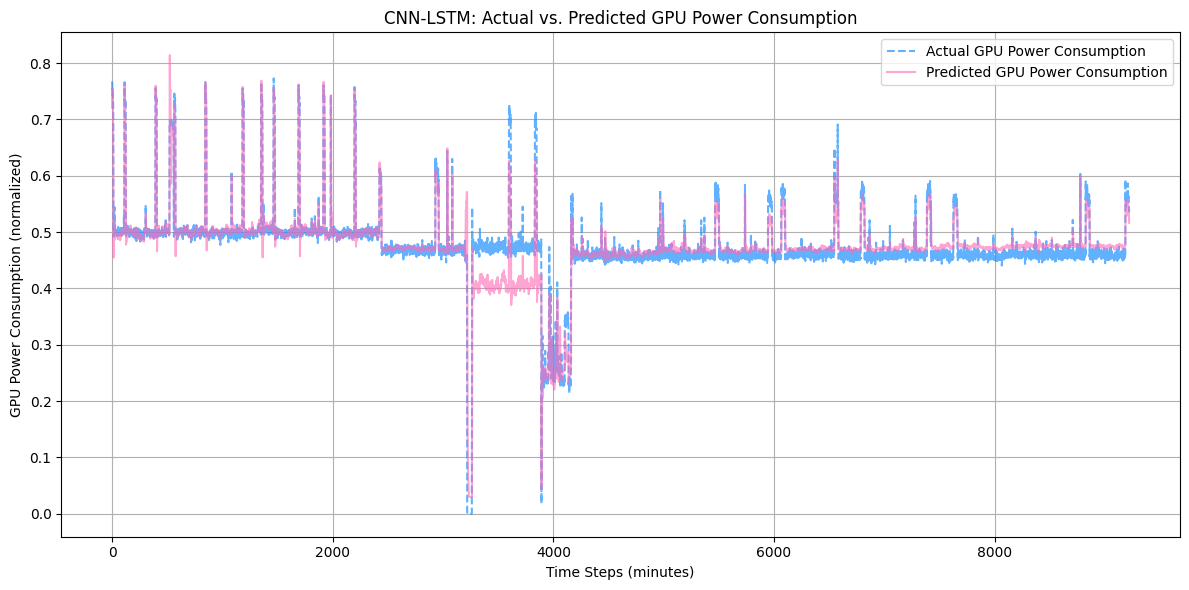

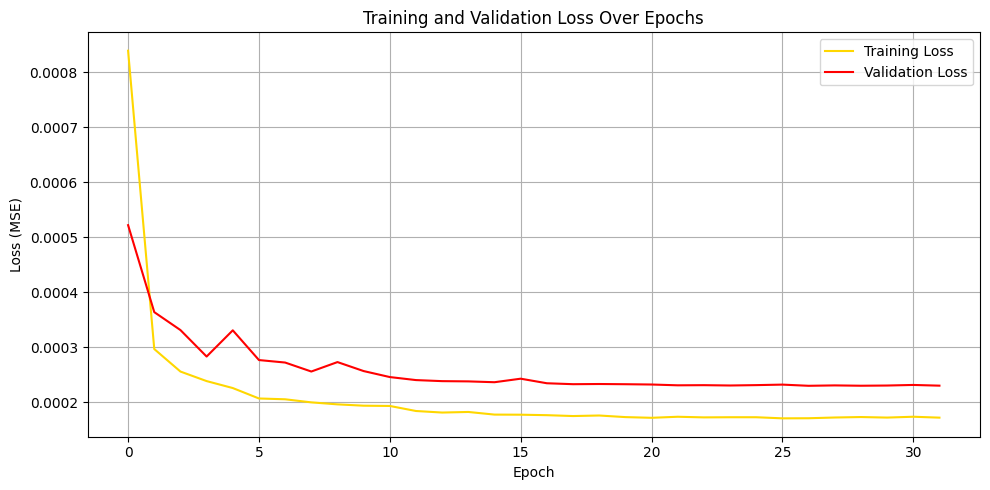

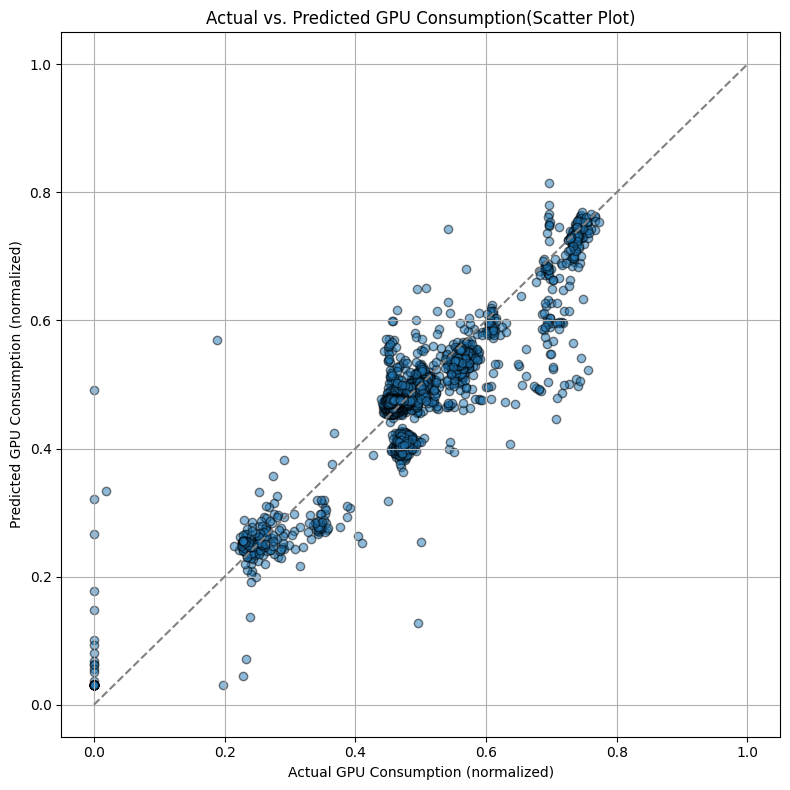

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, TimeDistributed, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from sklearn.preprocessing import MinMaxScaler  # May not be necessary if your data is already in [0,1].
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.optimizers import Adam


# Start timing
start_time = time.time()

# ---------------------------------------------------
# 1. Load and prepare data
# ---------------------------------------------------
data = pd.read_csv('normalized_allDataMeanFINAL_PUE.csv', encoding='ISO-8859-1')

# Convert DATETIME to datetime format and sort
data['DATETIME'] = pd.to_datetime(data['DATETIME'], errors='coerce')
data = data.sort_values(by='DATETIME')

# Define Features and Target
features = ['RAM temperature - Centigrade Degrees (Â°C)',
            'CPU temperature - Centigrade Degrees (Â°C)',
            'RAM memory consumption - Percentage (%)',
            'GPU temperature - Centigrade Degrees (Â°C)',
            'CPU power consumption - Percentage (%)',
            'IT Equipment Power (Watts)',
            'RAM memory power consumption - Percentage (%)',
            'Active Energy (KWh)']
target = ['GPU consumption - Percentage (%)']

# Ensure columns exist
available_features = [col for col in features if col in data.columns]
if target[0] not in data.columns:
    raise ValueError(f"Target column '{target[0]}' not found in dataset!")

# Drop rows with missing values
data = data.dropna(subset=available_features + target)

# (Optional) Scaling -- only if your data is not already in [0,1]
# scaler_features = MinMaxScaler()
# scaler_target = MinMaxScaler()
# feature_data = scaler_features.fit_transform(data[available_features])
# target_data = scaler_target.fit_transform(data[target])
# If data is already in [0,1], then just do:
feature_data = data[available_features].values
target_data = data[target].values.ravel()

# ---------------------------------------------------
# 2. Create sequences
# ---------------------------------------------------
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 16
X, y = create_sequences(feature_data, target_data, SEQ_LENGTH)

# ---------------------------------------------------
# 3. Train / validation / test split (70 / 15 / 15)
# ---------------------------------------------------
train_end = int(len(X) * 0.85)
val_end = int(len(X) * 0.95)
 # additional 15% for validation
X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val = X[train_end:val_end], y[train_end:val_end]
X_test, y_test = X[val_end:], y[val_end:]

#X_train, y_train = X[0:50000], y[0:50000]
#X_val, y_val = X[50001:60000], y[50001:60000]
#X_test, y_test = X[60001:75500], y[60001:75500]

'''
print("Training target mean:", y_train.mean(), "std:", y_train.std())
print("Validation target mean:", y_val.mean(), "std:", y_val.std())
print("Test target mean:", y_test.mean(), "std:", y_test.std())

import matplotlib.pyplot as plt
plt.plot(target_data)  # or data[target[0]]
plt.title("Target Over Time")
plt.xlabel("Time index")
plt.ylabel("CPU Power Consumption")
plt.show()
'''
# ---------------------------------------------------
# 4. Reshape for CNN-LSTM sub-sequence approach
# ---------------------------------------------------
sub_seq = 1
time_steps = SEQ_LENGTH // sub_seq
n_features = X.shape[2]

X_train = X_train.reshape((X_train.shape[0], sub_seq, time_steps, n_features))
X_val = X_val.reshape((X_val.shape[0], sub_seq, time_steps, n_features))
X_test = X_test.reshape((X_test.shape[0], sub_seq, time_steps, n_features))

# ---------------------------------------------------
# 5. Define CNN-LSTM model with kernel_size=3 + dropout=0.1
# ---------------------------------------------------
model = Sequential([
    TimeDistributed(Conv1D(filters=128, kernel_size=3, activation='relu'),
                    input_shape=(None, time_steps, n_features)),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    LSTM(64, activation='relu', dropout=0.3),
    Dense(1)
])
opt = Adam(learning_rate=1e-4)
model.compile(optimizer=opt, loss='mse')

# ---------------------------------------------------
# 6. Callbacks: EarlyStopping & ReduceLROnPlateau
# ---------------------------------------------------
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# ---------------------------------------------------
# 7. Train model: 30 epochs, with early stopping
# ---------------------------------------------------
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# ---------------------------------------------------
# 8. Predict and evaluate on test set
# ---------------------------------------------------
y_pred = model.predict(X_test)
rmse = (mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nCNN-LSTM Model Performance (Test Set)")
print(f"Test RMSE : {rmse:.6f}")
print(f"Test MAE  : {mae:.6f}")
print(f"Test R²   : {r2:.6f}")
print(f"Runtime: {time.time() - start_time:.2f} seconds")

# ---------------------------------------------------
# 9. Plot Actual vs Predicted
# ---------------------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual GPU Power Consumption", linestyle='--', alpha=0.7, color='dodgerblue')
plt.plot(y_pred, label="Predicted GPU Power Consumption", alpha=0.6, color='hotpink')
plt.xlabel("Time Steps (minutes)")
plt.ylabel("GPU Power Consumption (normalized)")
plt.title("CNN-LSTM: Actual vs. Predicted GPU Power Consumption")
plt.legend()
#plt.xlim(9000)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='gold')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # ideal line
plt.xlabel("Actual GPU Consumption (normalized)")
plt.ylabel("Predicted GPU Consumption (normalized)")
plt.title("Actual vs. Predicted GPU Consumption(Scatter Plot)")
plt.grid(True)
plt.tight_layout()
plt.show()




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
9797/9797 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 0.0020 - val_loss: 7.1722e-05 - learning_rate: 1.0000e-04
Epoch 2/50
9797/9797 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 2.1025e-04 - val_loss: 9.0816e-05 - learning_rate: 1.0000e-04
Epoch 3/50
9797/9797 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 1.4599e-04 - val_loss: 4.3051e-05 - learning_rate: 1.0000e-04
Epoch 4/50
9784/9797 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4632e-04
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
9797/9797 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 1.4629e-04 - val_loss: 3.6847e-05 - learning_rate: 1.0000e-04
Epoch 5/50
9797/9797 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 1.1355e-04 - val_loss: 3.5720e-05 - learning_rate: 5.0000e-05
Epoch 6/50
9797/9797 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 1.1146e-04 - val_loss: 3.5583e-05 - learning_rate: 5.0000e-05
Epoch 7/50
9796/9797 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0611e-04
Epoch 7: ReduceLROnPlateau reducing learnin

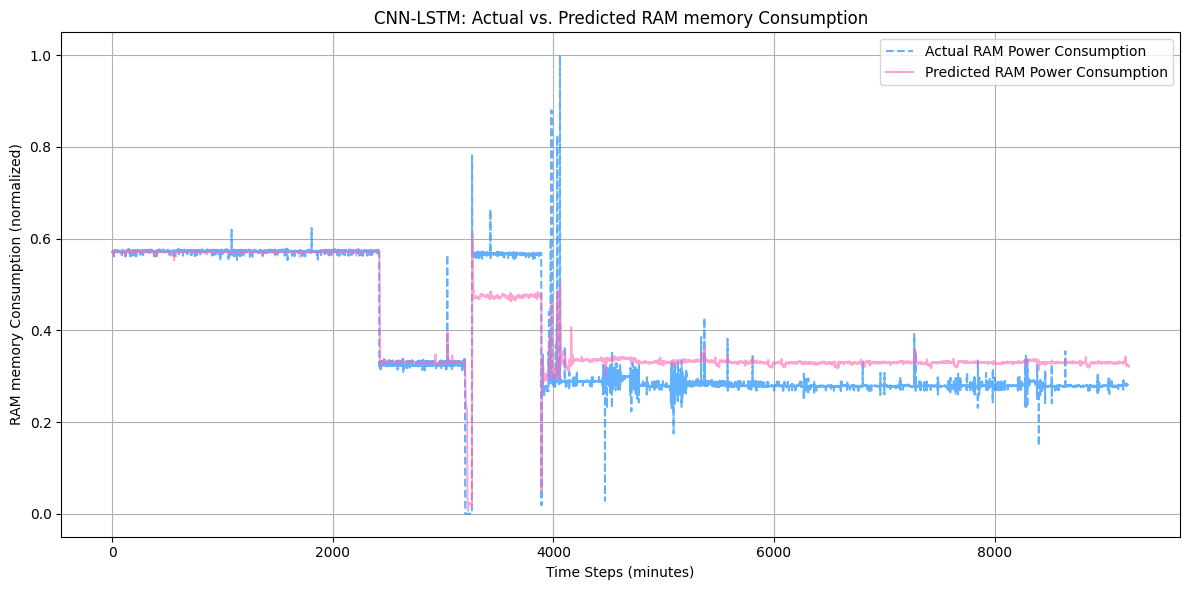

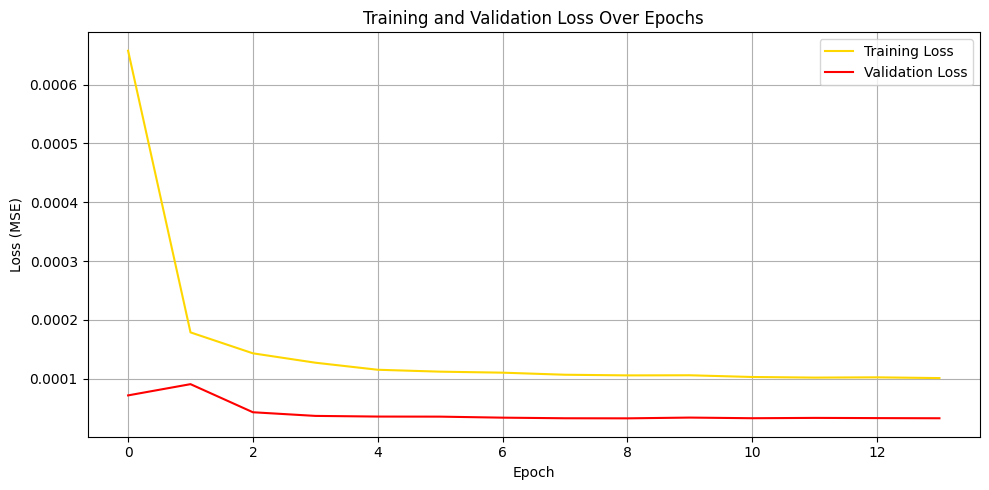

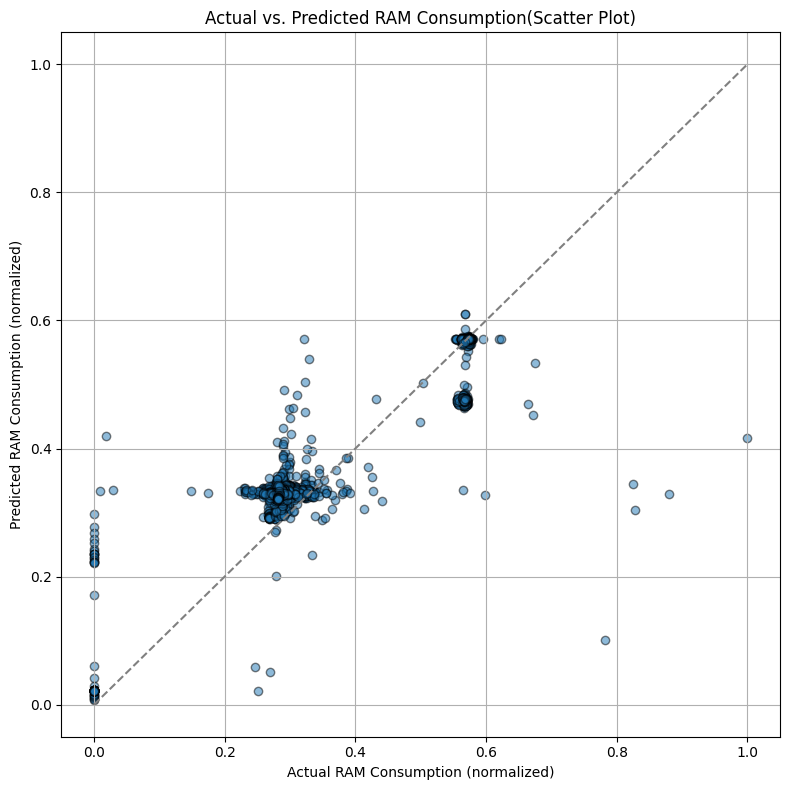

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, TimeDistributed, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from sklearn.preprocessing import MinMaxScaler  # May not be necessary if your data is already in [0,1].
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.optimizers import Adam


# Start timing
start_time = time.time()

# ---------------------------------------------------
# 1. Load and prepare data
# ---------------------------------------------------
data = pd.read_csv('normalized_allDataMeanFINAL_PUE.csv', encoding='ISO-8859-1')

# Convert DATETIME to datetime format and sort
data['DATETIME'] = pd.to_datetime(data['DATETIME'], errors='coerce')
data = data.sort_values(by='DATETIME')

# Define Features and Target
features = ['IT Equipment Power (Watts)',
            'CPU power consumption - Percentage (%)',
            'RAM memory consumption - Percentage (%)',
            'GPU consumption - Percentage (%)',
            'GPU temperature - Centigrade Degrees (Â°C)',
            'RAM temperature - Centigrade Degrees (Â°C)',
            'CPU temperature - Centigrade Degrees (Â°C)',
            'Power (PA) - Watts (W)',
            'Current (A)',
            'Active Energy (KWh)']
target = ['RAM memory consumption - Percentage (%)']

# Ensure columns exist
available_features = [col for col in features if col in data.columns]
if target[0] not in data.columns:
    raise ValueError(f"Target column '{target[0]}' not found in dataset!")

# Drop rows with missing values
data = data.dropna(subset=available_features + target)

# (Optional) Scaling -- only if your data is not already in [0,1]
# scaler_features = MinMaxScaler()
# scaler_target = MinMaxScaler()
# feature_data = scaler_features.fit_transform(data[available_features])
# target_data = scaler_target.fit_transform(data[target])
# If data is already in [0,1], then just do:
feature_data = data[available_features].values
target_data = data[target].values.ravel()

# ---------------------------------------------------
# 2. Create sequences
# ---------------------------------------------------
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 16
X, y = create_sequences(feature_data, target_data, SEQ_LENGTH)

# ---------------------------------------------------
# 3. Train / validation / test split (70 / 15 / 15)
# ---------------------------------------------------
train_end = int(len(X) * 0.85)
val_end = int(len(X) * 0.95)
 # additional 15% for validation
X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val = X[train_end:val_end], y[train_end:val_end]
X_test, y_test = X[val_end:], y[val_end:]

#X_train, y_train = X[0:50000], y[0:50000]
#X_val, y_val = X[50001:60000], y[50001:60000]
#X_test, y_test = X[60001:75500], y[60001:75500]

'''
print("Training target mean:", y_train.mean(), "std:", y_train.std())
print("Validation target mean:", y_val.mean(), "std:", y_val.std())
print("Test target mean:", y_test.mean(), "std:", y_test.std())

import matplotlib.pyplot as plt
plt.plot(target_data)  # or data[target[0]]
plt.title("Target Over Time")
plt.xlabel("Time index")
plt.ylabel("CPU Power Consumption")
plt.show()
'''
# ---------------------------------------------------
# 4. Reshape for CNN-LSTM sub-sequence approach
# ---------------------------------------------------
sub_seq = 1
time_steps = SEQ_LENGTH // sub_seq
n_features = X.shape[2]

X_train = X_train.reshape((X_train.shape[0], sub_seq, time_steps, n_features))
X_val = X_val.reshape((X_val.shape[0], sub_seq, time_steps, n_features))
X_test = X_test.reshape((X_test.shape[0], sub_seq, time_steps, n_features))

# ---------------------------------------------------
# 5. Define CNN-LSTM model with kernel_size=3 + dropout=0.1
# ---------------------------------------------------
model = Sequential([
    TimeDistributed(Conv1D(filters=128, kernel_size=3, activation='relu'),
                    input_shape=(None, time_steps, n_features)),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    LSTM(64, activation='relu', dropout=0.3),
    Dense(1)
])
opt = Adam(learning_rate=1e-4)
model.compile(optimizer=opt, loss='mse')

# ---------------------------------------------------
# 6. Callbacks: EarlyStopping & ReduceLROnPlateau
# ---------------------------------------------------
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# ---------------------------------------------------
# 7. Train model: 30 epochs, with early stopping
# ---------------------------------------------------
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# ---------------------------------------------------
# 8. Predict and evaluate on test set
# ---------------------------------------------------
y_pred = model.predict(X_test)
rmse = (mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nCNN-LSTM Model Performance (Test Set)")
print(f"Test RMSE : {rmse:.6f}")
print(f"Test MAE  : {mae:.6f}")
print(f"Test R²   : {r2:.6f}")
print(f"Runtime: {time.time() - start_time:.2f} seconds")

# ---------------------------------------------------
# 9. Plot Actual vs Predicted
# ---------------------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual RAM Power Consumption", linestyle='--', alpha=0.7, color='dodgerblue')
plt.plot(y_pred, label="Predicted RAM Power Consumption", alpha=0.6, color='hotpink')
plt.xlabel("Time Steps (minutes)")
plt.ylabel("RAM memory Consumption (normalized)")
plt.title("CNN-LSTM: Actual vs. Predicted RAM memory Consumption")
plt.legend()
#plt.xlim(9000)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='gold')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # ideal line
plt.xlabel("Actual RAM Consumption (normalized)")
plt.ylabel("Predicted RAM Consumption (normalized)")
plt.title("Actual vs. Predicted RAM Consumption(Scatter Plot)")
plt.grid(True)
plt.tight_layout()
plt.show()




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
9797/9797 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 0.0011 - val_loss: 2.5792e-04 - learning_rate: 1.0000e-04
Epoch 2/50
9797/9797 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 2.7581e-04 - val_loss: 2.4621e-04 - learning_rate: 1.0000e-04
Epoch 3/50
9797/9797 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 2.2532e-04 - val_loss: 2.1259e-04 - learning_rate: 1.0000e-04
Epoch 4/50
9794/9797 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0182e-04
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
9797/9797 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 2.0181e-04 - val_loss: 1.8142e-04 - learning_rate: 1.0000e-04
Epoch 5/50
9797/9797 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 1.6733e-04 - val_loss: 1.6909e-04 - learning_rate: 5.0000e-05
Epoch 6/50
9797/9797 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 1.5270e-04 - val_loss: 1.6125e-04 - learning_rate: 5.0000e-05
Epoch 7/50
9797/9797 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 1.5169e-04 - val_loss: 1.4592e-04 - learning_rate: 5.

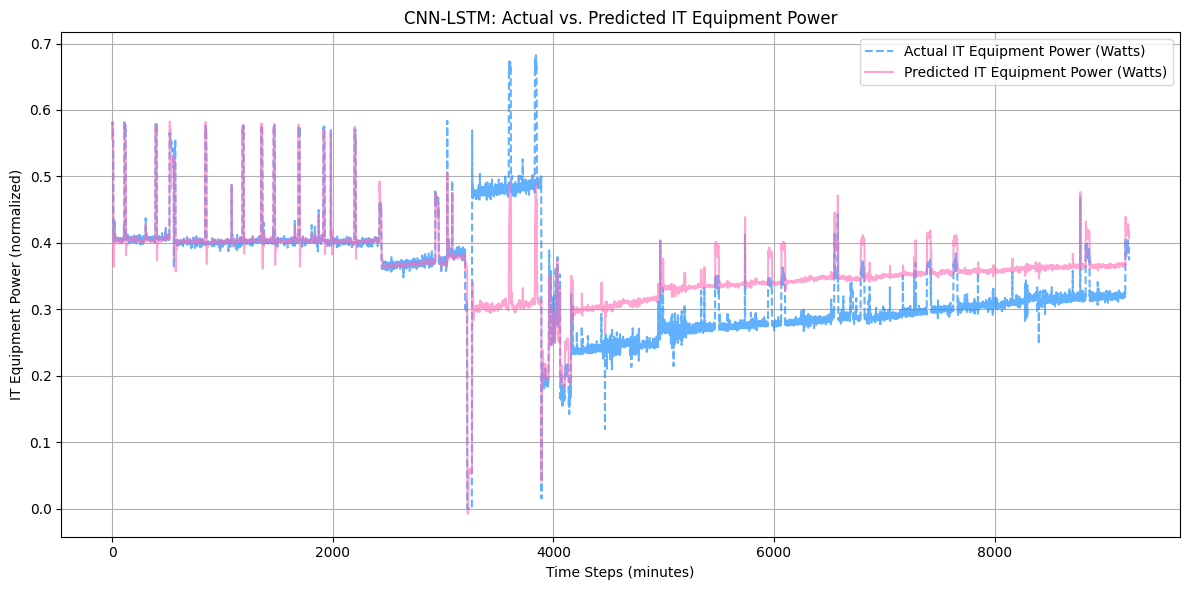

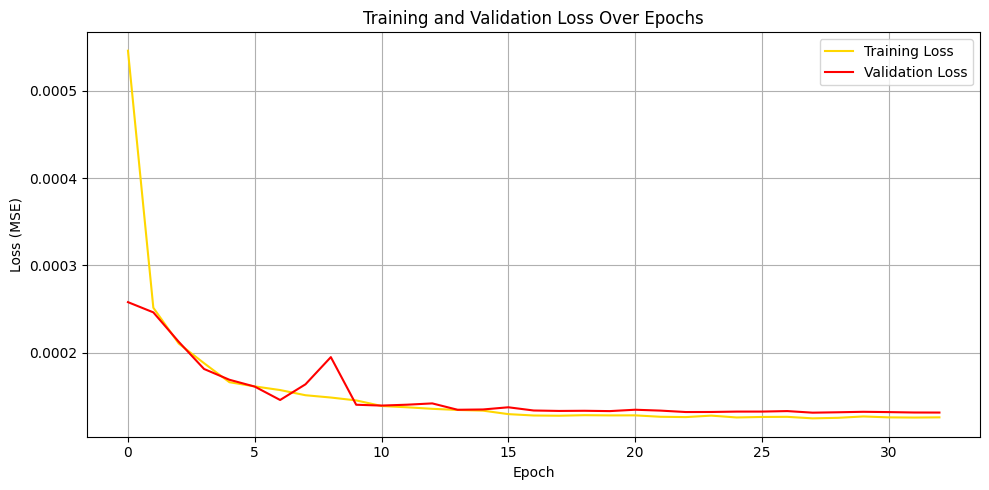

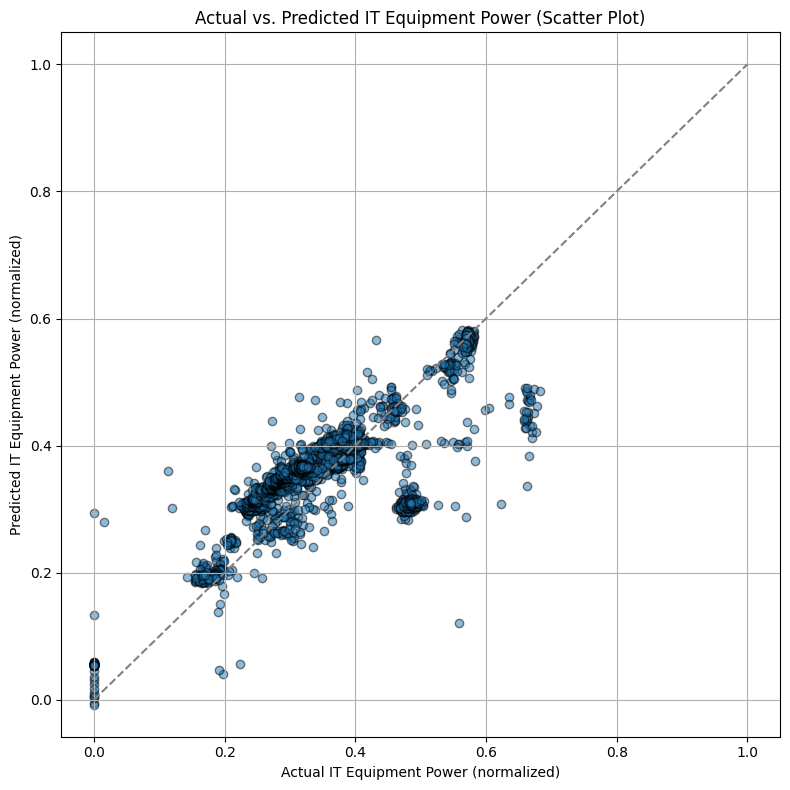

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, TimeDistributed, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from sklearn.preprocessing import MinMaxScaler  # May not be necessary if your data is already in [0,1].
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.optimizers import Adam


# Start timing
start_time = time.time()

# ---------------------------------------------------
# 1. Load and prepare data
# ---------------------------------------------------
data = pd.read_csv('normalized_allDataMeanFINAL_PUE.csv', encoding='ISO-8859-1')

# Convert DATETIME to datetime format and sort
data['DATETIME'] = pd.to_datetime(data['DATETIME'], errors='coerce')
data = data.sort_values(by='DATETIME')

# Define Features and Target
features = ['RAM memory power consumption - Percentage (%)',
            'CPU power consumption - Percentage (%)',
            'GPU consumption - Percentage (%)',
            'RAM temperature - Centigrade Degrees (Â°C)',
            'GPU temperature - Centigrade Degrees (Â°C)',
            'CPU temperature - Centigrade Degrees (Â°C)',
            'RAM memory consumption - Percentage (%)',
            'Power (PA) - Watts (W)',
            'Current (A)',
            'Active Energy (KWh)']
target = ['IT Equipment Power (Watts)']

# Ensure columns exist
available_features = [col for col in features if col in data.columns]
if target[0] not in data.columns:
    raise ValueError(f"Target column '{target[0]}' not found in dataset!")

# Drop rows with missing values
data = data.dropna(subset=available_features + target)

# (Optional) Scaling -- only if your data is not already in [0,1]
# scaler_features = MinMaxScaler()
# scaler_target = MinMaxScaler()
# feature_data = scaler_features.fit_transform(data[available_features])
# target_data = scaler_target.fit_transform(data[target])
# If data is already in [0,1], then just do:
feature_data = data[available_features].values
target_data = data[target].values.ravel()

# ---------------------------------------------------
# 2. Create sequences
# ---------------------------------------------------
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 16
X, y = create_sequences(feature_data, target_data, SEQ_LENGTH)

# ---------------------------------------------------
# 3. Train / validation / test split (70 / 15 / 15)
# ---------------------------------------------------
train_end = int(len(X) * 0.85)
val_end = int(len(X) * 0.95)
 # additional 15% for validation
X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val = X[train_end:val_end], y[train_end:val_end]
X_test, y_test = X[val_end:], y[val_end:]

#X_train, y_train = X[0:50000], y[0:50000]
#X_val, y_val = X[50001:60000], y[50001:60000]
#X_test, y_test = X[60001:75500], y[60001:75500]

'''
print("Training target mean:", y_train.mean(), "std:", y_train.std())
print("Validation target mean:", y_val.mean(), "std:", y_val.std())
print("Test target mean:", y_test.mean(), "std:", y_test.std())

import matplotlib.pyplot as plt
plt.plot(target_data)  # or data[target[0]]
plt.title("Target Over Time")
plt.xlabel("Time index")
plt.ylabel("CPU Power Consumption")
plt.show()
'''
# ---------------------------------------------------
# 4. Reshape for CNN-LSTM sub-sequence approach
# ---------------------------------------------------
sub_seq = 1
time_steps = SEQ_LENGTH // sub_seq
n_features = X.shape[2]

X_train = X_train.reshape((X_train.shape[0], sub_seq, time_steps, n_features))
X_val = X_val.reshape((X_val.shape[0], sub_seq, time_steps, n_features))
X_test = X_test.reshape((X_test.shape[0], sub_seq, time_steps, n_features))

# ---------------------------------------------------
# 5. Define CNN-LSTM model with kernel_size=3 + dropout=0.1
# ---------------------------------------------------
model = Sequential([
    TimeDistributed(Conv1D(filters=128, kernel_size=3, activation='relu'),
                    input_shape=(None, time_steps, n_features)),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    LSTM(64, activation='relu', dropout=0.3),
    Dense(1)
])
opt = Adam(learning_rate=1e-4)
model.compile(optimizer=opt, loss='mse')

# ---------------------------------------------------
# 6. Callbacks: EarlyStopping & ReduceLROnPlateau
# ---------------------------------------------------
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# ---------------------------------------------------
# 7. Train model: 30 epochs, with early stopping
# ---------------------------------------------------
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)



# ---------------------------------------------------
# 8. Predict and evaluate on test set
# ---------------------------------------------------
y_pred = model.predict(X_test)

# ---------------------------------------------------
# 8. Predict and evaluate on test set
# ---------------------------------------------------
y_pred = model.predict(X_test)

# ---------------------------------------------------
# 9. Compute PUE metrics
# ---------------------------------------------------

# Determine split index for test portion
split_index = len(data) - len(y_test)

# Get actual IT power values and facility power (from original dataframe)
actual_it_power_full = data['IT Equipment Power (Watts)'].values
facility_power_full = data['Power (PA) - Watts (W)'].values

# Extract test portion
actual_it_power_test = actual_it_power_full[split_index:]
facility_power_test = facility_power_full[split_index:]

# Define mask where actual IT power is non-zero (to avoid division by zero)
active_mask = actual_it_power_test > 0

# Apply mask
actual_it_power_test_active = actual_it_power_test[active_mask]
facility_power_test_active = facility_power_test[active_mask]
predicted_it_power_active = y_pred.flatten()[active_mask]

# Sanity check
assert len(actual_it_power_test_active) == len(facility_power_test_active) == len(predicted_it_power_active), "Mismatch in lengths!"

# Compute average values
avg_actual_it_power = np.mean(actual_it_power_test_active)
avg_predicted_it_power = np.mean(predicted_it_power_active)
avg_facility_power = np.mean(facility_power_test_active)

# Compute PUEs
actual_pue = avg_facility_power / avg_actual_it_power
predicted_pue = avg_facility_power / avg_predicted_it_power



rmse = (mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nCNN-LSTM Model Performance (Test Set)")
print(f"Test RMSE : {rmse:.6f}")
print(f"Test MAE  : {mae:.6f}")
print(f"Test R²   : {r2:.6f}")
print(f"Actual PUE (average)   : {actual_pue:.2f}")
print(f"Predicted PUE (average): {predicted_pue:.2f}")
print(f"Runtime: {time.time() - start_time:.2f} seconds")

# ---------------------------------------------------
# 9. Plot Actual vs Predicted
# ---------------------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual IT Equipment Power (Watts)", linestyle='--', alpha=0.7, color='dodgerblue')
plt.plot(y_pred, label="Predicted IT Equipment Power (Watts)", alpha=0.6, color='hotpink')
plt.xlabel("Time Steps (minutes)")
plt.ylabel("IT Equipment Power (normalized)")
plt.title("CNN-LSTM: Actual vs. Predicted IT Equipment Power")
plt.legend()
#plt.xlim(9000)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='gold')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # ideal line
plt.xlabel("Actual IT Equipment Power (normalized)")
plt.ylabel("Predicted IT Equipment Power (normalized)")
plt.title("Actual vs. Predicted IT Equipment Power (Scatter Plot)")
plt.grid(True)
plt.tight_layout()
plt.show()




**MODEL 2: Transformer Model Implementation**

There is 4 code blocks to run, for each component

1.   CPU Power Consumption
2.   GPU Power Consumption
3.   RAM Power Consumption
4.   Combined IT Equipment Power Consumption


Transformer Model Architeture

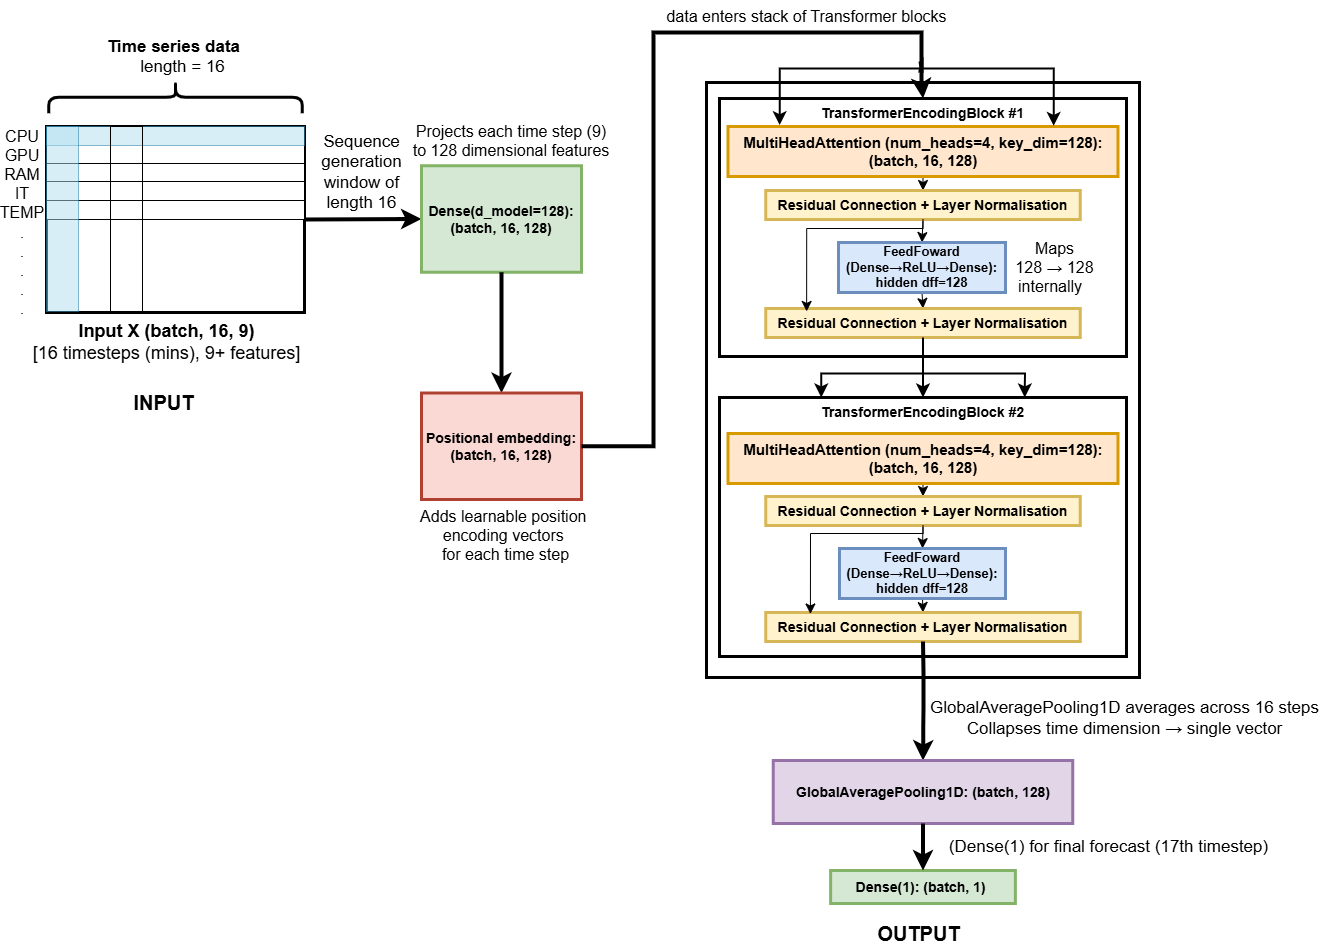

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, LayerNormalization, Dropout,
    MultiHeadAttention, Embedding
)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.layers import GlobalAveragePooling1D

# -------------------------------------------------------------------
# 1. Start Timing
# -------------------------------------------------------------------
start_time = time.time()

# -------------------------------------------------------------------
# 2. Load and Prepare Data
# -------------------------------------------------------------------
data = pd.read_csv('normalized_allDataMeanFINAL_PUE.csv', encoding='ISO-8859-1')

# Convert DATETIME to datetime format and sort
data['DATETIME'] = pd.to_datetime(data['DATETIME'], errors='coerce')
data = data.sort_values(by='DATETIME')

# Define Features and Target
features = [
    'IT Equipment Power (Watts)',
    'RAM memory power consumption - Percentage (%)',
    'GPU consumption - Percentage (%)',
    'CPU temperature - Centigrade Degrees (Â°C)',
    'RAM temperature - Centigrade Degrees (Â°C)',
    'GPU temperature - Centigrade Degrees (Â°C)',
    'RAM memory consumption - Percentage (%)',
    'Power (PA) - Watts (W)',
    'Current (A)'
]
target = ['CPU power consumption - Percentage (%)']

# Ensure columns exist
available_features = [col for col in features if col in data.columns]
if target[0] not in data.columns:
    raise ValueError(f"Target column '{target[0]}' not found in dataset!")

# Drop rows with missing values
data = data.dropna(subset=available_features + target)

# (Optional) Scaling -- If not in [0,1], add your own scalers
feature_data = data[available_features].values
target_data = data[target].values.ravel()

# -------------------------------------------------------------------
# 3. Create Sequences for Direct Multi-step Forecast
#    (Here we do single-step output, but you can adapt T>1 easily.)
# -------------------------------------------------------------------
SEQ_LENGTH = 16  # Example: 16 time steps to predict the next step
def create_sequences(features, target, seq_length):
    X, y = [], []
    for i in range(len(features) - seq_length):
        X.append(features[i : i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(feature_data, target_data, SEQ_LENGTH)

# -------------------------------------------------------------------
# 4. Train / Val / Test Split (70 / 15 / 15)
# -------------------------------------------------------------------
train_end = int(len(X) * 0.70)
val_end   = int(len(X) * 0.85)

X_train, y_train = X[:train_end],        y[:train_end]
X_val,   y_val   = X[train_end:val_end], y[train_end:val_end]
X_test,  y_test  = X[val_end:],          y[val_end:]

print("Shapes:", X_train.shape, X_val.shape, X_test.shape)

# -------------------------------------------------------------------
# 5. Transformer Model Definition
# -------------------------------------------------------------------
class PositionalEmbedding(tf.keras.layers.Layer):
    """
    Simple learnable positional embedding:
      - input shape: (batch, seq_len, d_model)
      - returns same shape with position embeddings added
    """
    def __init__(self, seq_len, d_model):
        super().__init__()
        # Each of seq_len positions has a d_model-dim embedding
        self.pos_embed = tf.keras.layers.Embedding(
            input_dim=seq_len,
            output_dim=d_model
        )
        self.seq_len = seq_len

    def call(self, x):
        """
        x: (batch_size, seq_len, d_model)
        We add an embedding vector for each position i in 0..seq_len-1
        """
        positions = tf.range(start=0, limit=self.seq_len, delta=1)
        pos_embeddings = self.pos_embed(positions)
        return x + pos_embeddings

class TransformerEncoderBlock(tf.keras.layers.Layer):
    """
    One Transformer Encoder block:
      - MultiHead Self-Attention
      - Add & LayerNorm
      - FeedForward
      - Add & LayerNorm
    """
    def __init__(self, d_model, num_heads, dff, dropout_rate=0.1):
        super().__init__()
        self.mha = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)

        self.ffn = tf.keras.Sequential([
            Dense(dff, activation='relu'),
            Dense(d_model),
        ])
        self.dropout1 = Dropout(dropout_rate)
        self.dropout2 = Dropout(dropout_rate)

    def call(self, x, training=False):
        # x.shape = (batch, seq_len, d_model)

        # Multi-head self-attention
        attn_output = self.mha(x, x, x)  # self-attention
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)

        # Feed-forward
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)
        return out2

def build_transformer_model(
        seq_len,
        num_features,
        d_model=64,
        num_heads=4,
        dff=128,
        num_layers=2,
        dropout_rate=0.1
    ):
    """
    Build an encoder-only Transformer for regression.
    """
    inputs = Input(shape=(seq_len, num_features))  # (None, seq_len, n_features)

    # 1) Project features to d_model
    x = Dense(d_model)(inputs)

    # 2) Add positional embedding
    x = PositionalEmbedding(seq_len, d_model)(x)

    # 3) Stack multiple TransformerEncoderBlocks
    for _ in range(num_layers):
        x = TransformerEncoderBlock(d_model, num_heads, dff, dropout_rate)(x)

    # 4) Pooling or Flatten to get a single vector
    #    For forecasting, either pool the last token or use GlobalAverage

    x = GlobalAveragePooling1D()(x)


    # 5) Final regression head
    outputs = Dense(1)(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# -------------------------------------------------------------------
# 6. Instantiate and Compile the Transformer Model
# -------------------------------------------------------------------
d_model   = 128    # Latent dimensionality
num_heads = 4     # Number of attention heads
dff       = 128   # Feed-forward inner-layer size
num_layers= 2     # Number of stacked encoder blocks

transformer_model = build_transformer_model(
    seq_len=SEQ_LENGTH,
    num_features=X_train.shape[2],
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    num_layers=num_layers,
    dropout_rate=0.1
)
transformer_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='mse'
)
transformer_model.summary()

# -------------------------------------------------------------------
# 7. Callbacks: EarlyStopping & ReduceLROnPlateau
# -------------------------------------------------------------------
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# -------------------------------------------------------------------
# 8. Train the Transformer
# -------------------------------------------------------------------
history = transformer_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# -------------------------------------------------------------------
# 9. Prediction and Metrics
# -------------------------------------------------------------------
y_pred = transformer_model.predict(X_test)

# Use sqrt of MSE for RMSE
mse_val = mean_squared_error(y_test, y_pred)
rmse_val = mse_val
mae_val = mean_absolute_error(y_test, y_pred)
r2_val = r2_score(y_test, y_pred)

print("\nTransformer Model Performance (Test Set)")
print(f"Test RMSE : {rmse_val:.6f}")
print(f"Test MAE  : {mae_val:.6f}")
print(f"Test R²   : {r2_val:.6f}")
print(f"Runtime   : {time.time() - start_time:.2f} seconds")

# -------------------------------------------------------------------
# 10. Plot Actual vs. Predicted
# -------------------------------------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual", linestyle='--', alpha=0.7, color='dodgerblue')
plt.plot(y_pred, label="Predicted", alpha=0.6, color='hotpink')
plt.xlabel("Time Steps")
plt.ylabel("CPU Power Consumption (normalized)")
plt.title("Transformer: Actual vs. Predicted CPU Power Consumption")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='gold')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("CPU Power consumption Training and Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Actual (normalized)")
plt.ylabel("Predicted (normalized)")
plt.title("Transformer: Actual vs. Predicted CPU Power consumption (Scatter Plot)")
plt.grid(True)
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'normalized_allDataMeanFINAL_PUE.csv'

Shapes: (129085, 16, 8) (27661, 16, 8) (27662, 16, 8)


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 16, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16, 128)        │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ positional_embedding_1          │ (None, 16, 128)        │         2,048 │
│ (PositionalEmbedding)           │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder_block_2     │ (None, 16, 128)        │       297,344 │
│ (TransformerEncoderBlock)       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder_block_3     │ (None, 16, 128)        │       297,344 │
│ (TransformerEncoderBlock)       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 598,017 (2.28 MB)

 Trainable params: 598,017 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4034/4034 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - loss: 0.0221 - val_loss: 0.0013 - learning_rate: 1.0000e-04
Epoch 2/50
4034/4034 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 0.0013 - val_loss: 1.1183e-04 - learning_rate: 1.0000e-04
Epoch 3/50
4034/4034 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 5.8287e-04 - val_loss: 3.6855e-06 - learning_rate: 1.0000e-04
Epoch 4/50
4034/4034 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 4.4224e-04 - val_loss: 1.2397e-05 - learning_rate: 1.0000e-04
Epoch 5/50
4034/4034 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 3.7911e-04 - val_loss: 1.8217e-06 - learning_rate: 1.0000e-04
Epoch 6/50
4034/4034 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 3.1095e-04 - val_loss: 1.7914e-06 - learning_rate: 1.0000e-04
Epoch 7/50
4034/4034 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 2.6074e-04 - val_loss: 3.5718e-05 - learning_rate: 1.0000e-04
Epoch 8/50
4034/4034 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5336e-04
Epoch 8: ReduceLROnPlateau reducing learning rate to 4.999999873

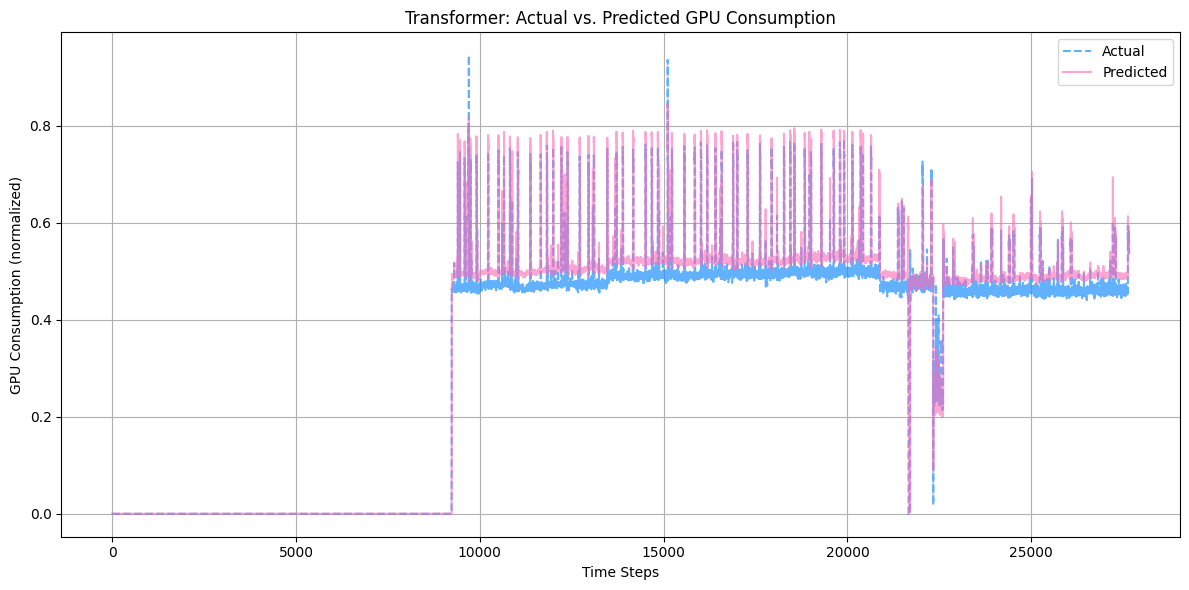

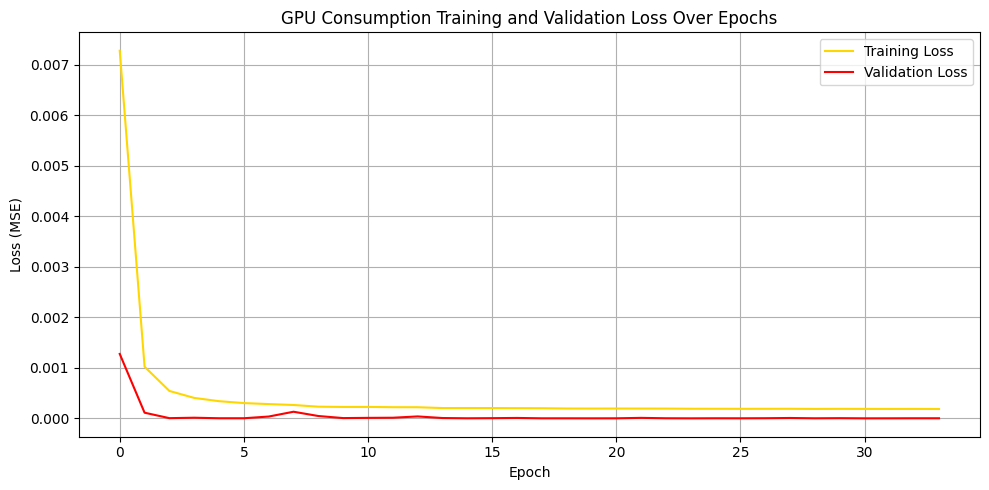

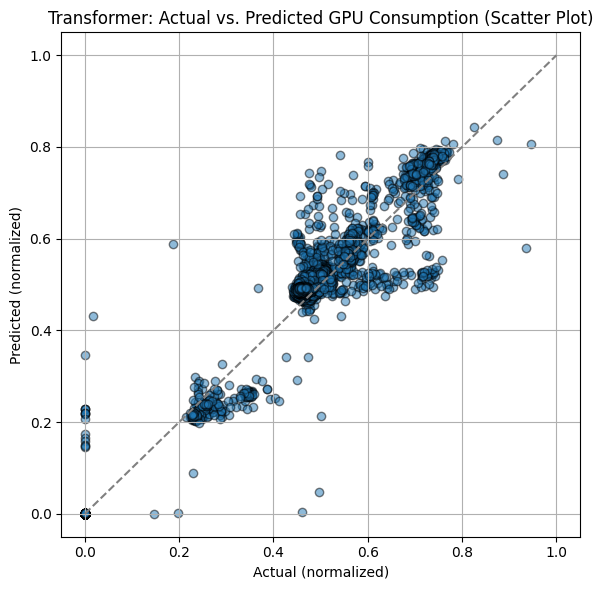

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, LayerNormalization, Dropout,
    MultiHeadAttention, Embedding
)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.layers import GlobalAveragePooling1D

# -------------------------------------------------------------------
# 1. Start Timing
# -------------------------------------------------------------------
start_time = time.time()

# -------------------------------------------------------------------
# 2. Load and Prepare Data
# -------------------------------------------------------------------
data = pd.read_csv('normalized_allDataMeanFINAL_PUE.csv', encoding='ISO-8859-1')

# Convert DATETIME to datetime format and sort
data['DATETIME'] = pd.to_datetime(data['DATETIME'], errors='coerce')
data = data.sort_values(by='DATETIME')

# Define Features and Target
features = ['RAM temperature - Centigrade Degrees (Â°C)',
            'CPU temperature - Centigrade Degrees (Â°C)',
            'RAM memory consumption - Percentage (%)',
            'GPU temperature - Centigrade Degrees (Â°C)',
            'CPU power consumption - Percentage (%)',
            'IT Equipment Power (Watts)',
            'RAM memory power consumption - Percentage (%)',
            'Active Energy (KWh)']
target = ['GPU consumption - Percentage (%)']

# Ensure columns exist
available_features = [col for col in features if col in data.columns]
if target[0] not in data.columns:
    raise ValueError(f"Target column '{target[0]}' not found in dataset!")

# Drop rows with missing values
data = data.dropna(subset=available_features + target)

# (Optional) Scaling -- If not in [0,1], add your own scalers
feature_data = data[available_features].values
target_data = data[target].values.ravel()

# -------------------------------------------------------------------
# 3. Create Sequences for Direct Multi-step Forecast
#    (Here we do single-step output, but you can adapt T>1 easily.)
# -------------------------------------------------------------------
SEQ_LENGTH = 16  # Example: 16 time steps to predict the next step
def create_sequences(features, target, seq_length):
    X, y = [], []
    for i in range(len(features) - seq_length):
        X.append(features[i : i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(feature_data, target_data, SEQ_LENGTH)

# -------------------------------------------------------------------
# 4. Train / Val / Test Split (70 / 15 / 15)
# -------------------------------------------------------------------
train_end = int(len(X) * 0.70)
val_end   = int(len(X) * 0.85)

X_train, y_train = X[:train_end],        y[:train_end]
X_val,   y_val   = X[train_end:val_end], y[train_end:val_end]
X_test,  y_test  = X[val_end:],          y[val_end:]

print("Shapes:", X_train.shape, X_val.shape, X_test.shape)

# -------------------------------------------------------------------
# 5. Transformer Model Definition
# -------------------------------------------------------------------
class PositionalEmbedding(tf.keras.layers.Layer):
    """
    Simple learnable positional embedding:
      - input shape: (batch, seq_len, d_model)
      - returns same shape with position embeddings added
    """
    def __init__(self, seq_len, d_model):
        super().__init__()
        # Each of seq_len positions has a d_model-dim embedding
        self.pos_embed = tf.keras.layers.Embedding(
            input_dim=seq_len,
            output_dim=d_model
        )
        self.seq_len = seq_len

    def call(self, x):
        """
        x: (batch_size, seq_len, d_model)
        We add an embedding vector for each position i in 0..seq_len-1
        """
        positions = tf.range(start=0, limit=self.seq_len, delta=1)
        pos_embeddings = self.pos_embed(positions)
        return x + pos_embeddings

class TransformerEncoderBlock(tf.keras.layers.Layer):
    """
    One Transformer Encoder block:
      - MultiHead Self-Attention
      - Add & LayerNorm
      - FeedForward
      - Add & LayerNorm
    """
    def __init__(self, d_model, num_heads, dff, dropout_rate=0.1):
        super().__init__()
        self.mha = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)

        self.ffn = tf.keras.Sequential([
            Dense(dff, activation='relu'),
            Dense(d_model),
        ])
        self.dropout1 = Dropout(dropout_rate)
        self.dropout2 = Dropout(dropout_rate)

    def call(self, x, training=False):
        # x.shape = (batch, seq_len, d_model)

        # Multi-head self-attention
        attn_output = self.mha(x, x, x)  # self-attention
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)

        # Feed-forward
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)
        return out2

def build_transformer_model(
        seq_len,
        num_features,
        d_model=64,
        num_heads=4,
        dff=128,
        num_layers=2,
        dropout_rate=0.1
    ):
    """
    Build an encoder-only Transformer for regression.
    """
    inputs = Input(shape=(seq_len, num_features))  # (None, seq_len, n_features)

    # 1) Project features to d_model
    x = Dense(d_model)(inputs)

    # 2) Add positional embedding
    x = PositionalEmbedding(seq_len, d_model)(x)

    # 3) Stack multiple TransformerEncoderBlocks
    for _ in range(num_layers):
        x = TransformerEncoderBlock(d_model, num_heads, dff, dropout_rate)(x)

    # 4) Pooling or Flatten to get a single vector
    #    For forecasting, either pool the last token or use GlobalAverage

    x = GlobalAveragePooling1D()(x)


    # 5) Final regression head
    outputs = Dense(1)(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# -------------------------------------------------------------------
# 6. Instantiate and Compile the Transformer Model
# -------------------------------------------------------------------
d_model   = 128    # Latent dimensionality
num_heads = 4     # Number of attention heads
dff       = 128   # Feed-forward inner-layer size
num_layers= 2     # Number of stacked encoder blocks

transformer_model = build_transformer_model(
    seq_len=SEQ_LENGTH,
    num_features=X_train.shape[2],
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    num_layers=num_layers,
    dropout_rate=0.1
)
transformer_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='mse'
)
transformer_model.summary()

# -------------------------------------------------------------------
# 7. Callbacks: EarlyStopping & ReduceLROnPlateau
# -------------------------------------------------------------------
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# -------------------------------------------------------------------
# 8. Train the Transformer
# -------------------------------------------------------------------
history = transformer_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# -------------------------------------------------------------------
# 9. Prediction and Metrics
# -------------------------------------------------------------------
y_pred = transformer_model.predict(X_test)

# Use sqrt of MSE for RMSE
mse_val = mean_squared_error(y_test, y_pred)
rmse_val = mse_val
mae_val = mean_absolute_error(y_test, y_pred)
r2_val = r2_score(y_test, y_pred)

print("\nTransformer Model Performance (Test Set)")
print(f"Test RMSE : {rmse_val:.6f}")
print(f"Test MAE  : {mae_val:.6f}")
print(f"Test R²   : {r2_val:.6f}")
print(f"Runtime   : {time.time() - start_time:.2f} seconds")

# -------------------------------------------------------------------
# 10. Plot Actual vs. Predicted
# -------------------------------------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual", linestyle='--', alpha=0.7, color='dodgerblue')
plt.plot(y_pred, label="Predicted", alpha=0.6, color='hotpink')
plt.xlabel("Time Steps")
plt.ylabel("GPU Consumption (normalized)")
plt.title("Transformer: Actual vs. Predicted GPU Consumption")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='gold')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("GPU Consumption Training and Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Actual (normalized)")
plt.ylabel("Predicted (normalized)")
plt.title("Transformer: Actual vs. Predicted GPU Consumption (Scatter Plot)")
plt.grid(True)
plt.tight_layout()
plt.show()


Shapes: (129085, 16, 10) (27661, 16, 10) (27662, 16, 10)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 16, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16, 128)        │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ positional_embedding            │ (None, 16, 128)        │         2,048 │
│ (PositionalEmbedding)           │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder_block       │ (None, 16, 128)        │       297,344 │
│ (TransformerEncoderBlock)       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder_block_1     │ (None, 16, 128)        │       297,344 │
│ (TransformerEncoderBlock)       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 598,273 (2.28 MB)

 Trainable params: 598,273 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4034/4034 ━━━━━━━━━━━━━━━━━━━━ 54s 8ms/step - loss: 0.0071 - val_loss: 0.0081 - learning_rate: 1.0000e-04
Epoch 2/50
4034/4034 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 8.3641e-04 - val_loss: 0.0036 - learning_rate: 1.0000e-04
Epoch 3/50
4034/4034 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 3.9210e-04 - val_loss: 9.5147e-04 - learning_rate: 1.0000e-04
Epoch 4/50
4034/4034 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 2.8188e-04 - val_loss: 1.0620e-05 - learning_rate: 1.0000e-04
Epoch 5/50
4034/4034 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 2.0196e-04 - val_loss: 6.8285e-06 - learning_rate: 1.0000e-04
Epoch 6/50
4034/4034 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 2.1852e-04 - val_loss: 1.3393e-05 - learning_rate: 1.0000e-04
Epoch 7/50
4034/4034 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 1.5193e-04 - val_loss: 2.4436e-05 - learning_rate: 1.0000e-04
Epoch 8/50
4034/4034 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 1.9152e-04 - val_loss: 1.4453e-05 - learning_rate: 1.0000e-04
Epoch 9/50
4

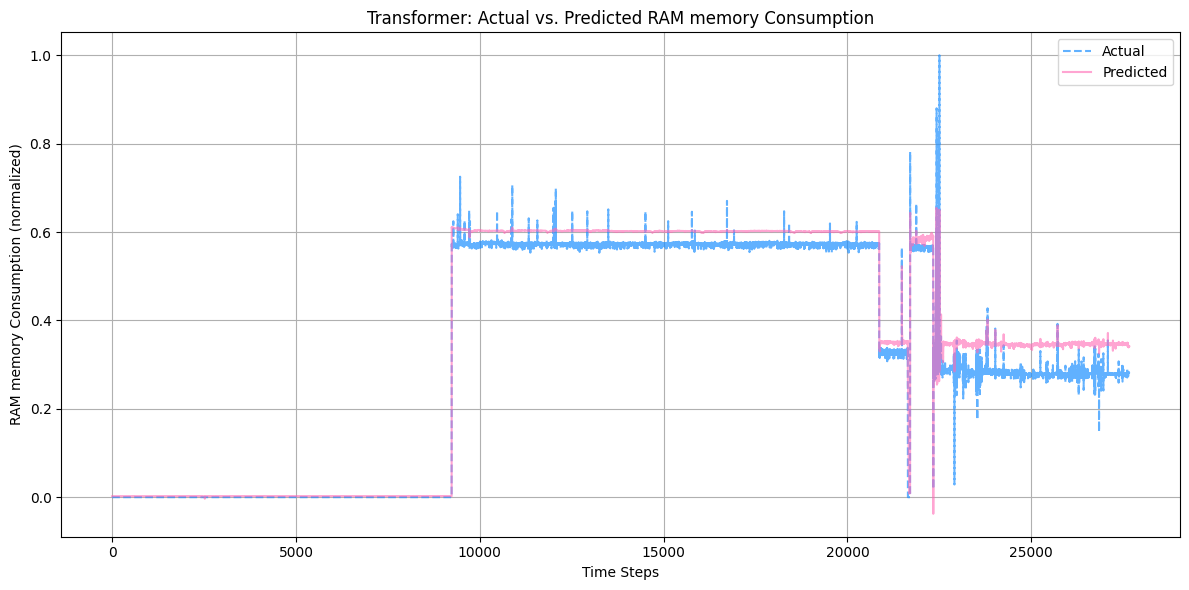

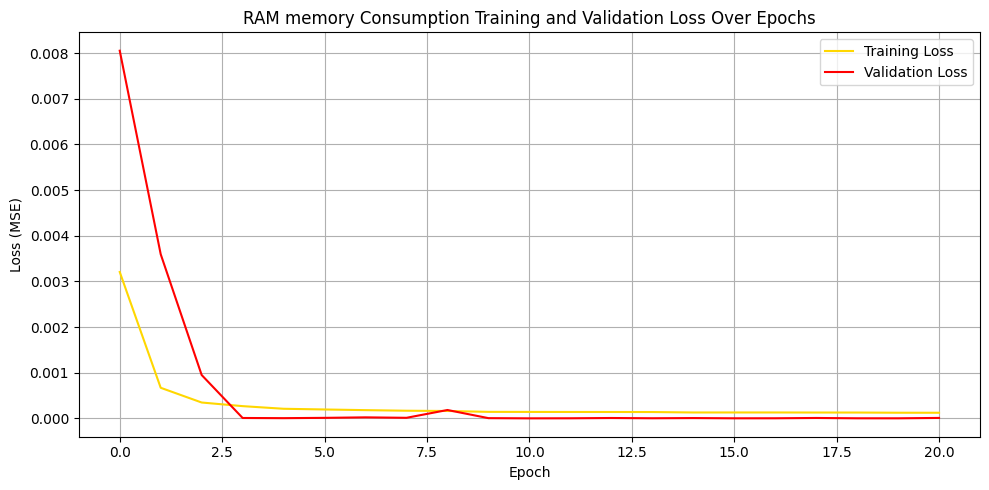

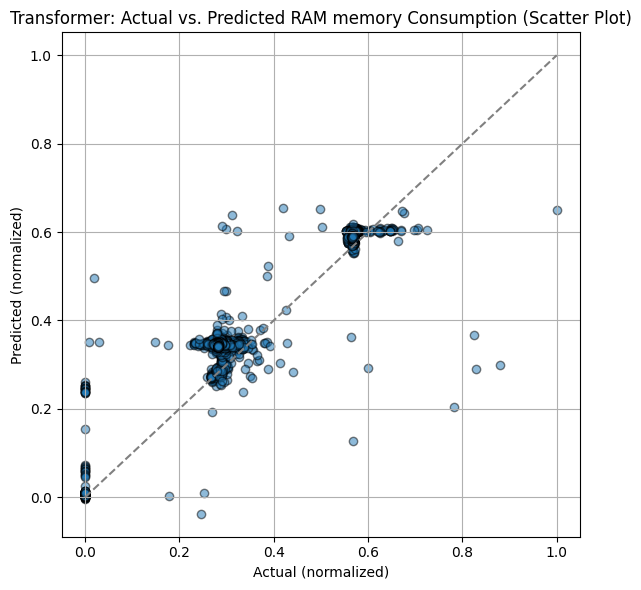

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, LayerNormalization, Dropout,
    MultiHeadAttention, Embedding
)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.layers import GlobalAveragePooling1D

# -------------------------------------------------------------------
# 1. Start Timing
# -------------------------------------------------------------------
start_time = time.time()

# -------------------------------------------------------------------
# 2. Load and Prepare Data
# -------------------------------------------------------------------
data = pd.read_csv('normalized_allDataMeanFINAL_PUE.csv', encoding='ISO-8859-1')

# Convert DATETIME to datetime format and sort
data['DATETIME'] = pd.to_datetime(data['DATETIME'], errors='coerce')
data = data.sort_values(by='DATETIME')

# Define Features and Target
features = ['IT Equipment Power (Watts)',
            'CPU power consumption - Percentage (%)',
            'RAM memory consumption - Percentage (%)',
            'GPU consumption - Percentage (%)',
            'GPU temperature - Centigrade Degrees (Â°C)',
            'RAM temperature - Centigrade Degrees (Â°C)',
            'CPU temperature - Centigrade Degrees (Â°C)',
            'Power (PA) - Watts (W)',
            'Current (A)',
            'Active Energy (KWh)']
target = ['RAM memory consumption - Percentage (%)']

# Ensure columns exist
available_features = [col for col in features if col in data.columns]
if target[0] not in data.columns:
    raise ValueError(f"Target column '{target[0]}' not found in dataset!")

# Drop rows with missing values
data = data.dropna(subset=available_features + target)

# (Optional) Scaling -- If not in [0,1], add your own scalers
feature_data = data[available_features].values
target_data = data[target].values.ravel()

# -------------------------------------------------------------------
# 3. Create Sequences for Direct Multi-step Forecast
#    (Here we do single-step output, but you can adapt T>1 easily.)
# -------------------------------------------------------------------
SEQ_LENGTH = 16  # Example: 16 time steps to predict the next step
def create_sequences(features, target, seq_length):
    X, y = [], []
    for i in range(len(features) - seq_length):
        X.append(features[i : i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(feature_data, target_data, SEQ_LENGTH)

# -------------------------------------------------------------------
# 4. Train / Val / Test Split (70 / 15 / 15)
# -------------------------------------------------------------------
train_end = int(len(X) * 0.70)
val_end   = int(len(X) * 0.85)

X_train, y_train = X[:train_end],        y[:train_end]
X_val,   y_val   = X[train_end:val_end], y[train_end:val_end]
X_test,  y_test  = X[val_end:],          y[val_end:]

print("Shapes:", X_train.shape, X_val.shape, X_test.shape)

# -------------------------------------------------------------------
# 5. Transformer Model Definition
# -------------------------------------------------------------------
class PositionalEmbedding(tf.keras.layers.Layer):
    """
    Simple learnable positional embedding:
      - input shape: (batch, seq_len, d_model)
      - returns same shape with position embeddings added
    """
    def __init__(self, seq_len, d_model):
        super().__init__()
        # Each of seq_len positions has a d_model-dim embedding
        self.pos_embed = tf.keras.layers.Embedding(
            input_dim=seq_len,
            output_dim=d_model
        )
        self.seq_len = seq_len

    def call(self, x):
        """
        x: (batch_size, seq_len, d_model)
        We add an embedding vector for each position i in 0..seq_len-1
        """
        positions = tf.range(start=0, limit=self.seq_len, delta=1)
        pos_embeddings = self.pos_embed(positions)
        return x + pos_embeddings

class TransformerEncoderBlock(tf.keras.layers.Layer):
    """
    One Transformer Encoder block:
      - MultiHead Self-Attention
      - Add & LayerNorm
      - FeedForward
      - Add & LayerNorm
    """
    def __init__(self, d_model, num_heads, dff, dropout_rate=0.1):
        super().__init__()
        self.mha = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)

        self.ffn = tf.keras.Sequential([
            Dense(dff, activation='relu'),
            Dense(d_model),
        ])
        self.dropout1 = Dropout(dropout_rate)
        self.dropout2 = Dropout(dropout_rate)

    def call(self, x, training=False):
        # x.shape = (batch, seq_len, d_model)

        # Multi-head self-attention
        attn_output = self.mha(x, x, x)  # self-attention
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)

        # Feed-forward
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)
        return out2

def build_transformer_model(
        seq_len,
        num_features,
        d_model=64,
        num_heads=4,
        dff=128,
        num_layers=2,
        dropout_rate=0.1
    ):
    """
    Build an encoder-only Transformer for regression.
    """
    inputs = Input(shape=(seq_len, num_features))  # (None, seq_len, n_features)

    # 1) Project features to d_model
    x = Dense(d_model)(inputs)

    # 2) Add positional embedding
    x = PositionalEmbedding(seq_len, d_model)(x)

    # 3) Stack multiple TransformerEncoderBlocks
    for _ in range(num_layers):
        x = TransformerEncoderBlock(d_model, num_heads, dff, dropout_rate)(x)

    # 4) Pooling or Flatten to get a single vector
    #    For forecasting, either pool the last token or use GlobalAverage

    x = GlobalAveragePooling1D()(x)


    # 5) Final regression head
    outputs = Dense(1)(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# -------------------------------------------------------------------
# 6. Instantiate and Compile the Transformer Model
# -------------------------------------------------------------------
d_model   = 128    # Latent dimensionality
num_heads = 4     # Number of attention heads
dff       = 128   # Feed-forward inner-layer size
num_layers= 2     # Number of stacked encoder blocks

transformer_model = build_transformer_model(
    seq_len=SEQ_LENGTH,
    num_features=X_train.shape[2],
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    num_layers=num_layers,
    dropout_rate=0.1
)
transformer_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='mse'
)
transformer_model.summary()

# -------------------------------------------------------------------
# 7. Callbacks: EarlyStopping & ReduceLROnPlateau
# -------------------------------------------------------------------
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# -------------------------------------------------------------------
# 8. Train the Transformer
# -------------------------------------------------------------------
history = transformer_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# -------------------------------------------------------------------
# 9. Prediction and Metrics
# -------------------------------------------------------------------
y_pred = transformer_model.predict(X_test)

# Use sqrt of MSE for RMSE
mse_val = mean_squared_error(y_test, y_pred)
rmse_val = mse_val
mae_val = mean_absolute_error(y_test, y_pred)
r2_val = r2_score(y_test, y_pred)

print("\nTransformer Model Performance (Test Set)")
print(f"Test RMSE : {rmse_val:.6f}")
print(f"Test MAE  : {mae_val:.6f}")
print(f"Test R²   : {r2_val:.6f}")
print(f"Runtime   : {time.time() - start_time:.2f} seconds")

# -------------------------------------------------------------------
# 10. Plot Actual vs. Predicted
# -------------------------------------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual", linestyle='--', alpha=0.7, color='dodgerblue')
plt.plot(y_pred, label="Predicted", alpha=0.6, color='hotpink')
plt.xlabel("Time Steps")
plt.ylabel("RAM memory Consumption (normalized)")
plt.title("Transformer: Actual vs. Predicted RAM memory Consumption")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='gold')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("RAM memory Consumption Training and Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Actual (normalized)")
plt.ylabel("Predicted (normalized)")
plt.title("Transformer: Actual vs. Predicted RAM memory Consumption (Scatter Plot)")
plt.grid(True)
plt.tight_layout()
plt.show()


Shapes: (129085, 16, 10) (27661, 16, 10) (27662, 16, 10)


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 16, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16, 128)        │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ positional_embedding_3          │ (None, 16, 128)        │         2,048 │
│ (PositionalEmbedding)           │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder_block_6     │ (None, 16, 128)        │       297,344 │
│ (TransformerEncoderBlock)       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder_block_7     │ (None, 16, 128)        │       297,344 │
│ (TransformerEncoderBlock)       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_3      │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 598,273 (2.28 MB)

 Trainable params: 598,273 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4034/4034 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - loss: 0.0121 - val_loss: 0.0078 - learning_rate: 1.0000e-04
Epoch 2/50
4034/4034 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 9.3683e-04 - val_loss: 0.0066 - learning_rate: 1.0000e-04
Epoch 3/50
4034/4034 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 4.5505e-04 - val_loss: 0.0089 - learning_rate: 1.0000e-04
Epoch 4/50
4034/4034 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 3.3893e-04 - val_loss: 0.0041 - learning_rate: 1.0000e-04
Epoch 5/50
4034/4034 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 2.7866e-04 - val_loss: 0.0023 - learning_rate: 1.0000e-04
Epoch 6/50
4034/4034 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 2.3933e-04 - val_loss: 0.0019 - learning_rate: 1.0000e-04
Epoch 7/50
4034/4034 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 2.3794e-04 - val_loss: 9.8994e-04 - learning_rate: 1.0000e-04
Epoch 8/50
4034/4034 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 1.9940e-04 - val_loss: 6.0261e-04 - learning_rate: 1.0000e-04
Epoch 9/50
4034/4034 ━━━━━━━

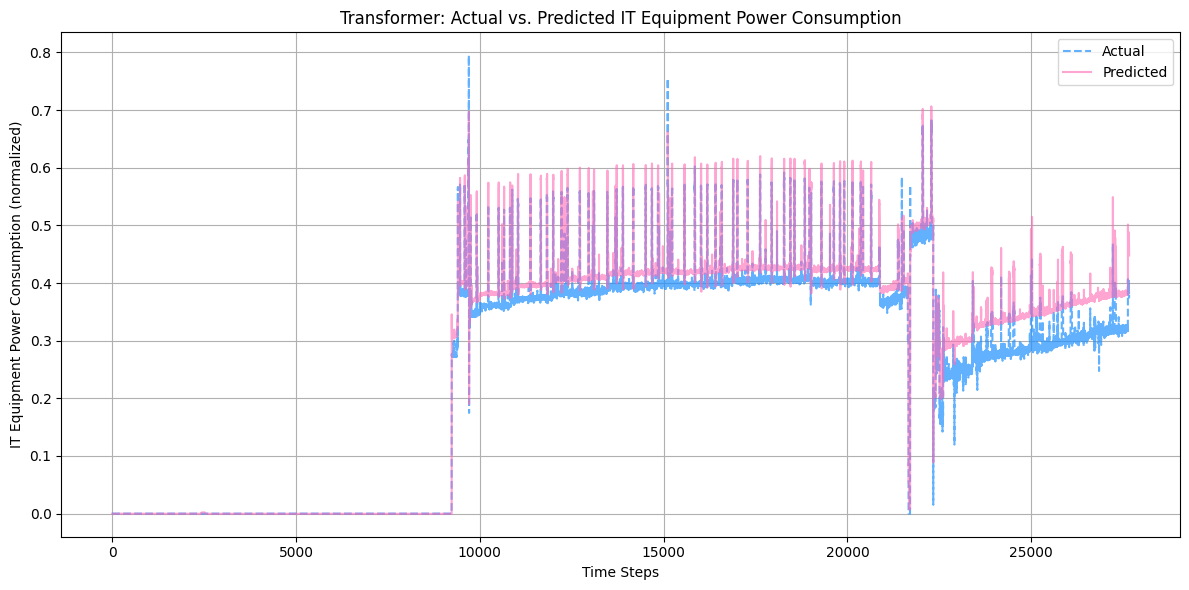

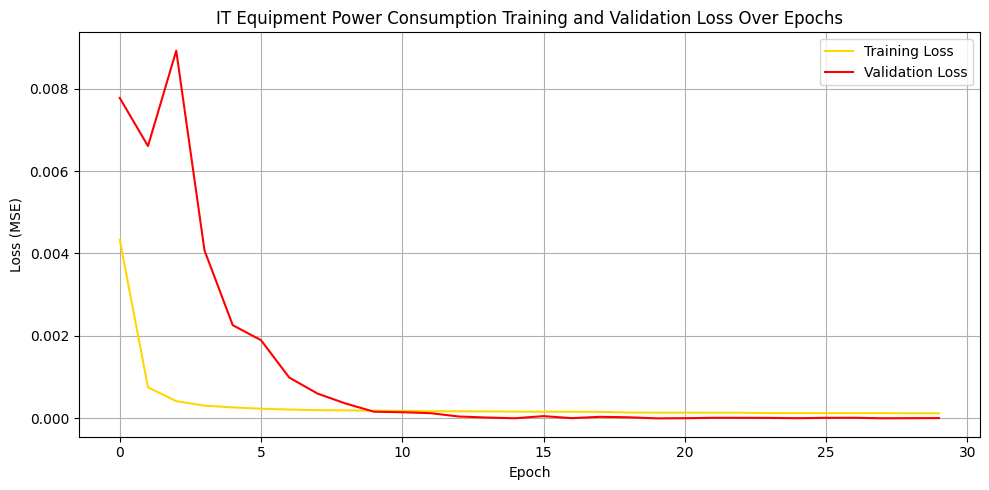

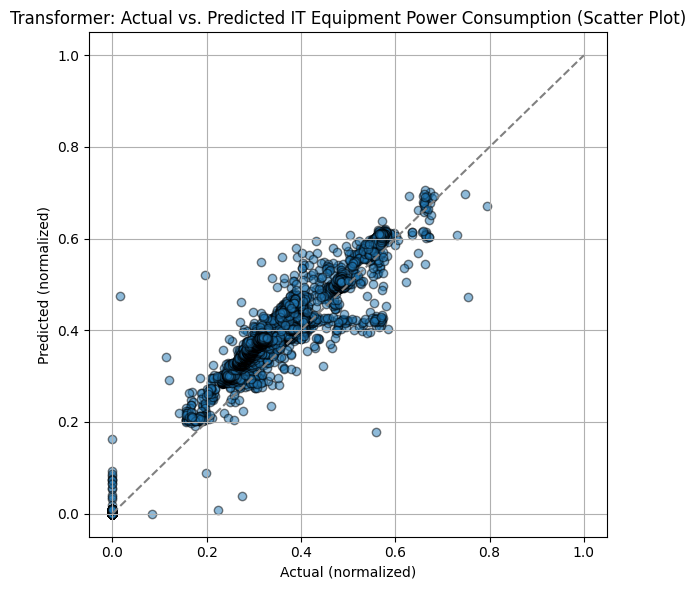

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, LayerNormalization, Dropout,
    MultiHeadAttention, Embedding
)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.layers import GlobalAveragePooling1D

# -------------------------------------------------------------------
# 1. Start Timing
# -------------------------------------------------------------------
start_time = time.time()

# -------------------------------------------------------------------
# 2. Load and Prepare Data
# -------------------------------------------------------------------
data = pd.read_csv('normalized_allDataMeanFINAL_PUE.csv', encoding='ISO-8859-1')

# Convert DATETIME to datetime format and sort
data['DATETIME'] = pd.to_datetime(data['DATETIME'], errors='coerce')
data = data.sort_values(by='DATETIME')

# Define Features and Target
features = ['RAM memory power consumption - Percentage (%)',
            'CPU power consumption - Percentage (%)',
            'GPU consumption - Percentage (%)',
            'RAM temperature - Centigrade Degrees (Â°C)',
            'GPU temperature - Centigrade Degrees (Â°C)',
            'CPU temperature - Centigrade Degrees (Â°C)',
            'RAM memory consumption - Percentage (%)',
            'Power (PA) - Watts (W)',
            'Current (A)',
            'Active Energy (KWh)']
target = ['IT Equipment Power (Watts)']

# Ensure columns exist
available_features = [col for col in features if col in data.columns]
if target[0] not in data.columns:
    raise ValueError(f"Target column '{target[0]}' not found in dataset!")

# Drop rows with missing values
data = data.dropna(subset=available_features + target)

# (Optional) Scaling -- If not in [0,1], add your own scalers
feature_data = data[available_features].values
target_data = data[target].values.ravel()

# -------------------------------------------------------------------
# 3. Create Sequences for Direct Multi-step Forecast
#    (Here we do single-step output, but you can adapt T>1 easily.)
# -------------------------------------------------------------------
SEQ_LENGTH = 16  # Example: 16 time steps to predict the next step
def create_sequences(features, target, seq_length):
    X, y = [], []
    for i in range(len(features) - seq_length):
        X.append(features[i : i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(feature_data, target_data, SEQ_LENGTH)

# -------------------------------------------------------------------
# 4. Train / Val / Test Split (70 / 15 / 15)
# -------------------------------------------------------------------
train_end = int(len(X) * 0.70)
val_end   = int(len(X) * 0.85)

X_train, y_train = X[:train_end],        y[:train_end]
X_val,   y_val   = X[train_end:val_end], y[train_end:val_end]
X_test,  y_test  = X[val_end:],          y[val_end:]

print("Shapes:", X_train.shape, X_val.shape, X_test.shape)

# -------------------------------------------------------------------
# 5. Transformer Model Definition
# -------------------------------------------------------------------
class PositionalEmbedding(tf.keras.layers.Layer):
    """
    Simple learnable positional embedding:
      - input shape: (batch, seq_len, d_model)
      - returns same shape with position embeddings added
    """
    def __init__(self, seq_len, d_model):
        super().__init__()
        # Each of seq_len positions has a d_model-dim embedding
        self.pos_embed = tf.keras.layers.Embedding(
            input_dim=seq_len,
            output_dim=d_model
        )
        self.seq_len = seq_len

    def call(self, x):
        """
        x: (batch_size, seq_len, d_model)
        We add an embedding vector for each position i in 0..seq_len-1
        """
        positions = tf.range(start=0, limit=self.seq_len, delta=1)
        pos_embeddings = self.pos_embed(positions)
        return x + pos_embeddings

class TransformerEncoderBlock(tf.keras.layers.Layer):
    """
    One Transformer Encoder block:
      - MultiHead Self-Attention
      - Add & LayerNorm
      - FeedForward
      - Add & LayerNorm
    """
    def __init__(self, d_model, num_heads, dff, dropout_rate=0.1):
        super().__init__()
        self.mha = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)

        self.ffn = tf.keras.Sequential([
            Dense(dff, activation='relu'),
            Dense(d_model),
        ])
        self.dropout1 = Dropout(dropout_rate)
        self.dropout2 = Dropout(dropout_rate)

    def call(self, x, training=False):
        # x.shape = (batch, seq_len, d_model)

        # Multi-head self-attention
        attn_output = self.mha(x, x, x)  # self-attention
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)

        # Feed-forward
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)
        return out2

def build_transformer_model(
        seq_len,
        num_features,
        d_model=64,
        num_heads=4,
        dff=128,
        num_layers=2,
        dropout_rate=0.1
    ):
    """
    Build an encoder-only Transformer for regression.
    """
    inputs = Input(shape=(seq_len, num_features))  # (None, seq_len, n_features)

    # 1) Project features to d_model
    x = Dense(d_model)(inputs)

    # 2) Add positional embedding
    x = PositionalEmbedding(seq_len, d_model)(x)

    # 3) Stack multiple TransformerEncoderBlocks
    for _ in range(num_layers):
        x = TransformerEncoderBlock(d_model, num_heads, dff, dropout_rate)(x)

    # 4) Pooling or Flatten to get a single vector
    #    For forecasting, either pool the last token or use GlobalAverage

    x = GlobalAveragePooling1D()(x)


    # 5) Final regression head
    outputs = Dense(1)(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# -------------------------------------------------------------------
# 6. Instantiate and Compile the Transformer Model
# -------------------------------------------------------------------
d_model   = 128    # Latent dimensionality
num_heads = 4     # Number of attention heads
dff       = 128   # Feed-forward inner-layer size
num_layers= 2     # Number of stacked encoder blocks

transformer_model = build_transformer_model(
    seq_len=SEQ_LENGTH,
    num_features=X_train.shape[2],
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    num_layers=num_layers,
    dropout_rate=0.1
)
transformer_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='mse'
)
transformer_model.summary()

# -------------------------------------------------------------------
# 7. Callbacks: EarlyStopping & ReduceLROnPlateau
# -------------------------------------------------------------------
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# -------------------------------------------------------------------
# 8. Train the Transformer
# -------------------------------------------------------------------
history = transformer_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# -------------------------------------------------------------------
# 9. Prediction and Metrics
# -------------------------------------------------------------------
y_pred = transformer_model.predict(X_test)

# -------------------------------------------------------------------
# 9. Compute PUE metrics
# -------------------------------------------------------------------

# Determine split index for test portion
split_index = len(data) - len(y_test)

# Get actual IT power and facility power from original dataframe
actual_it_power_full = data['IT Equipment Power (Watts)'].values
facility_power_full = data['Power (PA) - Watts (W)'].values

# Extract the test portion
actual_it_power_test = actual_it_power_full[split_index:]
facility_power_test = facility_power_full[split_index:]

# Create mask to avoid division by zero
active_mask = actual_it_power_test > 0

# Filter arrays using the mask
actual_it_power_test_active = actual_it_power_test[active_mask]
facility_power_test_active = facility_power_test[active_mask]
predicted_it_power_active = y_pred.flatten()[active_mask]

# Sanity check
assert len(actual_it_power_test_active) == len(facility_power_test_active) == len(predicted_it_power_active), "Mismatch in array lengths!"

# Compute averages
avg_actual_it_power = np.mean(actual_it_power_test_active)
avg_predicted_it_power = np.mean(predicted_it_power_active)
avg_facility_power = np.mean(facility_power_test_active)

# Compute actual and predicted PUE
actual_pue = avg_facility_power / avg_actual_it_power
predicted_pue = avg_facility_power / avg_predicted_it_power




# Use sqrt of MSE for RMSE
mse_val = mean_squared_error(y_test, y_pred)
rmse_val = mse_val
mae_val = mean_absolute_error(y_test, y_pred)
r2_val = r2_score(y_test, y_pred)

print("\nTransformer Model Performance (Test Set)")
print(f"Test RMSE : {rmse_val:.6f}")
print(f"Test MAE  : {mae_val:.6f}")
print(f"Test R²   : {r2_val:.6f}")
print(f"Actual PUE (average)   : {actual_pue:.2f}")
print(f"Predicted PUE (average): {predicted_pue:.2f}")
print(f"Runtime   : {time.time() - start_time:.2f} seconds")

# -------------------------------------------------------------------
# 10. Plot Actual vs. Predicted
# -------------------------------------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual", linestyle='--', alpha=0.7, color='dodgerblue')
plt.plot(y_pred, label="Predicted", alpha=0.6, color='hotpink')
plt.xlabel("Time Steps")
plt.ylabel("IT Equipment Power Consumption (normalized)")
plt.title("Transformer: Actual vs. Predicted IT Equipment Power Consumption")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='gold')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("IT Equipment Power Consumption Training and Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Actual (normalized)")
plt.ylabel("Predicted (normalized)")
plt.title("Transformer: Actual vs. Predicted IT Equipment Power Consumption (Scatter Plot)")
plt.grid(True)
plt.tight_layout()
plt.show()
